## 눔(Noom)의 데이터분석 팀에 오신 것을 환영합니다!


[눔(Noom Inc.)](http://noom.com/)은 모바일 플랫폼을 통해 건강관리 서비스를 제공하는 회사로서 2008년, 정세주 대표와 구글 수석 엔지니어 출신이자 공동창업자인 아텀 페타코브(Artem Petakov)에 의해 설립되었습니다. 눔(Noom)은 미국, 일본, 독일, 한국 등 14개국에서 4,600만명이 가입한 글로벌 서비스로 성장하였고, 2009년과 2010년 연이어 구글(Google) 이 선정한 가장 혁신적인 개발 스타트업 중 하나로 선정되었습니다.

눔은 지금까지 다양한 서비스를 오픈해왔지만, 그 중에서도 가장 중요한 서비스를 하나 꼽자면 **눔 코치(Noom Coach)** 입니다.

<img src="https://www.dropbox.com/s/b0gsp4jncwwnoq0/noom-coach-logo.jpg?dl=1" alt="drawing" width="200"/>

눔 코치(Noom Coach) 어플리케이션의 사용자는 이 어플리케이션에서 본인의 식단과 운동에 대한 기록을 남길 수 있습니다. 이 기록을 바탕으로 사용자는 본인이 건강한 식습관 생활을 갖추고 있는지 스스로 판단할 수 있습니다. 또한 유료 모델에 가입하면 전문적인 코치가 채팅으로 통해 1대1로 식단과 운동을 코칭해줍니다.




1. **"눔의 내부 데이터를 다른 데이터 분석가가 이용할 수 있도록 정리하고, 정리한 데이터를 바탕으로 운영, 기획, 마케팅, 코칭 팀의 요청사항을 분석한 뒤 이 분석 결과를 전달"**
2. **"눔 머니백 다이어트 프로그램 마케팅 기획서 작성"**


눔(Noom)과 같이 데이터에 기반한 의사결정으로 일 하는 스타트업에서 데이터 분석가(Data Analyst)의 역할은 매우 중요합니다. 가령 눔의 마케팅 팀은 데이터 분석가(Data Analyst)의 분석 결과를 바탕으로 페이스북 광고 채널의 예산을 재조정(rebalancing)할 수 있습니다. 운영팀은 데이터 분석가(Data Analyst)가 찾아낸 VIP고객에게 혜택을 제공해줌으로서 그들이 계속 서비스를 이용하게 할 수 있습니다. 코칭 팀은 데이터 분석가(Data Analyst)가 분석한 고객의 코칭 만족도를 바탕으로 코칭 방침을 개선할 수 있습니다.


반면 데이터 분석가(Data Analyst)가 정확한 분석 결과를 전달해주지 못한다면, 마케팅팀은 마케팅 예산을 재조정(rebalancing)하는데 실패함으로써 회사의 매출을 감소시킬 수 있습니다. 운영팀은 VIP 고객의 이탈을 막지 못해 회사에 큰 손해를 끼칠 수 있습니다. 코칭팀은 고객들에게 만족스러운 코칭을 제공해주지 못함으로써 서비스의 만족도를 낮추고 회사의 매출과 성장에 악영향을 줄 수 있습니다.

In [1]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
import pandas as pd

## 데이터 로딩하기

먼저 데이터를 로딩해오겠습니다. 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용합니다.

In [2]:
# noom.csv 파일을 읽어옵니다.
# 이 데이터는 사용자의 프로필(성별, 나이 등)과 구매 정보 등을 담고 있습니다.
# 또한 이 과정에서 구매 날짜(Purchased At)는 별도로 날짜 컬럼으로 해석할 수 있게 parse_dates 옵션에 추각합니다.
# 이 결과를 raw_data라는 이름의 변수에 할당합니다.
raw_data = pd.read_csv("data/noom/qoom_user_data.csv", parse_dates=["Purchased At"])

# 읽어온 데이터의 컬럼명을 출력합니다.
print(raw_data.columns)

# raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(raw_data.shape)

# .head()로 raw_data 데이터의 상위 5개를 띄웁니다.
raw_data.head()

Index(['Unnamed: 0', 'Access Code', 'Name', 'Gender', 'Age', 'Height',
       'Initial Weight', 'Lowest Weight', 'Target Weight', 'Product Name',
       'Status', 'Price', 'Purchased At', 'Payment Type', 'Channel'],
      dtype='object')
(10000, 15)


,Unnamed: 0,Access Code,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Product Name,Status,Price,Purchased At,Payment Type,Channel
0,0,Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,눔 체중감량 프로그램,completed,112500,2022-04-14 19:03:29.976,Recurring,others
1,1,3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,눔 체중감량 프로그램,completed,44780,2022-05-23 20:53:54.368,Recurring,others
2,2,6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,눔 체중감량 프로그램 (천원 체험),completed,132000,2022-08-23 23:39:21.840,Recurring,facebook
3,3,EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,눔 체중감량 프로그램 (천원 체험),completed,112500,2022-08-28 20:18:22.824,Recurring,naver
4,4,1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,눔 체중감량 프로그램,completed,44780,2022-05-07 17:50:30.944,Recurring,facebook


컬럼에 대한 설명은 다음과 같습니다.

  * **Access Code** - 고객의 접근 코드, 쉽게 말해 고객을 식별할 수 있는 정보라고 보면 됩니다.
  * **Name** - 고객의 이름입니다. 한글로 되어있습니다.
  * **Gender** - 고객의 성별입니다. MALE과 FEMALE, 그리고 빈 값(NaN)으로 되어있습니다.
  * **Age** - 고객의 나이입니다.
  * **Height** - 고객의 키입니다. cm 기준입니다.
  * **Initial Weight** - 고객이 처음 눔 코치에 회원 가입 했을 당시의 몸무게입니다. kg 기준입니다.
  * **Lowest Weight** - 고객이 눔 코치를 이용하는 동안 측정한 몸무게 중, 가장 낮은 몸무게입니다. kg 기준입니다.
  * **Target Weight** - 고객이 눔 코치를 처음 회원 가입할 때 설정한 목표 몸무게입니다. kg 기준입니다.
  * **Product Name** - 눔 코치 프로그램의 상세 제품명입니다.
  * **Status** - 고객의 유료 서비스 결제 현황입니다. 결제중(complete), 결제 취소(cancelled), 환불 완료(refunded)로 되어있습니다.
  * **Price** - 서비스를 구입할 당시의 가격입니다. 원(₩) 기준입니다.
  * **Purchased At** - 서비스를 구입할 당시의 시간입니다.
  * **Payment Type** - 결제 방식입니다. 현재는 Recurring(구독형 결제)만 있습니다.
  * **Channel** - 서비스 구입 경로입니다. 구글, 페이스북, 네이버 등 다양한 경로를 통해 서비스를 구입하고 있습니다.
  


## 데이터 정리하기

데이터 분석을 하는데 있어서 가장 중요한 업무는 데이터를 정리(Data Cleaning)하는 일입니다. 현업에서 활동하는 데이터 분석가(Data Analyst)는 전체 업무 시간의 50% ~ 70%를 데이터를 정리하는데 사용합니다.

만일 파이썬과 판다스를 능숙하게 사용할 수 있다면 남들보다 빠르게 데이터를 정리하고 분석할 수 있습니다. 반면 파이썬과 판다스를 능숙하게 사용할 수 없다면, 남들보다 데이터를 정리하는데 시간이 오래 걸리게 되고 이는 곧 생산성의 차이로 이어집니다. 그러므로 빠른 시간 안에 효율적으로 데이터를 정리하는 스킬은 무엇보다도 중요합니다.

먼저 눔(Noom)의 데이터에서 정리가 필요한 몇몇 부분을 다뤄보겠습니다.

**1. 전체 컬럼에서 필요한 컬럼만 가져오세요.**

데이터를 분석할 때, 대부분의 경우 읽어온 컬럼 전체를 사용하는 경우는 없습니다. 그러므로 데이터를 분석하기 전에 사용하지 않는 컬럼을 사전에 정리해주면 더 편리하게 데이터를 분석할 수 있습니다.

이번 데이터 분석에서 필요한 컬럼은 다음과 같습니다.

 * ```Access Code```
 * ```Name```
 * ```Gender```
 * ```Age```
 * ```Height```
 * ```Initial Weight```
 * ```Lowest Weight```
 * ```Target Weight```
 * ```Status```
 * ```Price```
 * ```Purchased At```
 * ```Channel```

이 컬럼을 제외한 나머지 컬럼을 제거해주세요.

또한 위 컬럼에서 ```Access Code```를 인덱스(Index)로 지정해주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>Name</th>
            <th>Gender</th>
            <th>Age</th>
            <th>Height</th>
            <th>Initial Weight</th>
            <th>Lowest Weight</th>
            <th>Target Weight</th>
            <th>Status</th>
            <th>Price</th>
            <th>Purchased At</th>
            <th>Channel</th>
        </tr>
        <tr>
            <th>Access Code</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Y9RY2VSI</th>
            <td>김승혜</td>
            <td>FEMALE</td>
            <td>25.0</td>
            <td>172.0</td>
            <td>66.9</td>
            <td>65.8</td>
            <td>55.000000</td>
            <td>completed</td>
            <td>112500</td>
            <td>2017-04-14 19:03:29.976</td>
            <td>others</td>
        </tr>
        <tr>
            <th>3GTN3S3B</th>
            <td>허승준</td>
            <td>MALE</td>
            <td>26.0</td>
            <td>176.0</td>
            <td>70.0</td>
            <td>NaN</td>
            <td>65.000000</td>
            <td>completed</td>
            <td>44780</td>
            <td>2017-05-23 20:53:54.368</td>
            <td>others</td>
        </tr>
        <tr>
            <th>6B0IG276</th>
            <td>이지민</td>
            <td>FEMALE</td>
            <td>23.0</td>
            <td>171.0</td>
            <td>98.0</td>
            <td>NaN</td>
            <td>91.140000</td>
            <td>completed</td>
            <td>132000</td>
            <td>2017-08-23 23:39:21.840</td>
            <td>facebook</td>
        </tr>
        <tr>
            <th>EMGRU2MO</th>
            <td>장설윤</td>
            <td>FEMALE</td>
            <td>20.0</td>
            <td>160.0</td>
            <td>70.7</td>
            <td>NaN</td>
            <td>53.000000</td>
            <td>completed</td>
            <td>112500</td>
            <td>2017-08-28 20:18:22.824</td>
            <td>naver</td>
        </tr>
        <tr>
            <th>1ELG96TX</th>
            <td>서성빈</td>
            <td>FEMALE</td>
            <td>28.0</td>
            <td>165.0</td>
            <td>55.5</td>
            <td>NaN</td>
            <td>51.615002</td>
            <td>completed</td>
            <td>44780</td>
            <td>2017-05-07 17:50:30.944</td>
            <td>facebook</td>
        </tr>
    </tbody>
</table>

In [3]:
# 필요 없는 컬럼인 Product Name, Payment Type 컬럼을 drop을 이용해서 삭제합니다.
data = raw_data.drop(['Product Name', 'Payment Type'], axis=1)
# set_index: 'Access Code'를 인덱스로 지정합니다.
data = data.set_index(keys='Access Code')

data.head()

,Unnamed: 0,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel
Access Code,,,,,,,,,,,,
Y9RY2VSI,0,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2022-04-14 19:03:29.976,others
3GTN3S3B,1,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2022-05-23 20:53:54.368,others
6B0IG276,2,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2022-08-23 23:39:21.840,facebook
EMGRU2MO,3,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2022-08-28 20:18:22.824,naver
1ELG96TX,4,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2022-05-07 17:50:30.944,facebook


---

**2. 성별 컬럼을 정리해주세요.**

성별 컬럼(```Gender```)을 자세히 보시면, 크게 세 가지 종류가 있습니다.

In [4]:
# 성별(Gender) 컬럼에서 중복된 값을 제거합니다.
# 최종적으로 성별 컬럼의 종류가 나옵니다. (nan은 Not a Number, 즉 값이 없다는 의미입니다)
raw_data["Gender"].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

여기에서 남성과 여성을 굳이 대문자로 사용할 필요는 없을 것으로 보입니다. 가독성을 높이기 위해, 대문자로 되어있는 텍스트를 소문자로 변경해주세요. 가령 FEMALE은 female로, MALE은 male로 변경해주면 됩니다. 또한 원본을 훼손시키지 않기 위해, ```Gender``` 컬럼이 아닌 ```Gender(clean)```이라는 새로운 이름의 컬럼에 넣어주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Gender</th>
         <th>Gender(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>MALE</td>
         <td>male</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
   </tbody>
</table>

또한 ```Gender``` 컬럼을 정리한 뒤, 전체 가입자중 남성의 비율과 여성의 비율을 계산해주세요. 최종적으로는 **1) 여성 가입자가 8846명, 2) 남성 가입자가 1023명**이 되어야 합니다.

In [5]:
# str.lower(): Gender 컬럼을 소문자로 변환합니다.
data['Gender(clean)'] = data['Gender'].str.lower()

data['Gender(clean)'].unique()

array(['female', 'male', nan], dtype=object)

In [6]:
data[['Name', 'Gender', 'Gender(clean)']].head()

,Name,Gender,Gender(clean)
Access Code,,,
Y9RY2VSI,김승혜,FEMALE,female
3GTN3S3B,허승준,MALE,male
6B0IG276,이지민,FEMALE,female
EMGRU2MO,장설윤,FEMALE,female
1ELG96TX,서성빈,FEMALE,female


In [7]:
# value_counts(): 고유값별 데이터 개수를 보여줍니다.
data['Gender(clean)'].value_counts()

female    8846
male      1023
Name: Gender(clean), dtype: int64

In [8]:
print('여성 비율:', round(data.Gender.value_counts().values[0] / sum(data.Gender.value_counts().values), 3))
print('남성 비율:', round(data.Gender.value_counts().values[1] / sum(data.Gender.value_counts().values), 3))

여성 비율: 0.896
남성 비율: 0.104


---

**3. 키 컬럼을 정리해주세요.**

키(```Height```) 컬럼도 성별 컬럼과 같이 정리가 필요해보입니다. 가령 전체 눔 사용자중 가장 키가 작은 사람을 찾는다면, 다음의 결과가 나옵니다.

In [9]:
# Height 컬럼에서 가장 작은(min) 값을 찾아와서 출력합니다.
raw_data["Height"].min()

-1.0

하지만 모두가 알다싶이 키가 -1 cm인 사람은 존재하지 않습니다. 추측컨데, 데이터를 저장하는 담당자가 편의를 위해 키를 입력하지 않은 사용자를 NaN이 아닌 -1.0으로 기입한 것 같습니다. 이 경우 데이터를 저장하는데는 편리하지만, 데이터를 분석할 경우 통계치가 잘못 나올 가능성이 있습니다. (가령 평균 키를 계산하면 실제 평균보다 -1.0씩 밀리겠죠)

그러므로 원활한 분석을 위해서는 키 컬럼을 정리해줄 필요가 있습니다. 키가 -1 cm인 사람은 NaN으로 데이터를 넣어주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Height</th>
         <th>Height(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>O4OWMJG7</th>
         <td>오세윤</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>H6EV5AXL</th>
         <td>박슬지</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>O1IAZS7A</th>
         <td>고솔윤</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>5NEQOWHW</th>
         <td>손초영</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>OFAXUNXD</th>
         <td>백채우</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 1) 최소/최대/평균 키를 구하고, 2) 남성/여성별 평균 키를 구해주세요.

가령 현재 키가 가장 작은 사용자는 106.0cm이며, 가장 큰 사용자는 203.2cm, 평균 키는 약 163.54cm 입니다. 남성의 평균 키와 여성의 평균 키는 다음과 같습니다.
<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Height(clean)</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>female</th>
         <td>162.116913</td>
      </tr>
      <tr>
         <th>male</th>
         <td>175.831965</td>
      </tr>
   </tbody>
</table>

In [10]:
# nan 값으로 대체하기 위해 numpy 라이브러리를 불러옵니다.
import numpy as np

# replace(기존 값, 대체할 값): -1을 np.NaN으로 대체합니다.
data['Height(clean)'] = data['Height'].replace(-1, np.NaN)


data.loc[data.Height == -1 ,['Name', 'Height', 'Height(clean)']].head()

,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


In [11]:
# 최솟값이 106으로 바뀐 것을 확인할 수 있습니다. 평균도 163.19에서 163.54로 바뀌었습니다.
data.describe()[['Height(clean)']].loc[['min', 'max', 'mean'],:].round(2)

,Height(clean)
min,106.00
max,203.20
mean,163.54


In [12]:
pd.pivot_table(data, index='Gender(clean)', values='Height(clean)')

,Height(clean)
Gender(clean),
female,162.116913
male,175.831965


---

**4. 나이 컬럼을 정리해주세요.**

3번과 비슷한 이유로, 나이(```Age```) 컬럼도 정리를 해야될 것 같습니다. 가령 전체 눔 사용자 중에서, 가장 나이가 어린 사람과 가장 나이가 많은 사람은 다음과 같습니다.

In [13]:
# 가장 나이가 어린 고객을 찾습니다.
# 결과는 0세라고 나오지만, 0세 사용자가 이 서비스를 사용할 가능성은 없습니다.
# 즉, 이 데이터는 잘못 기입된 데이터라고 판단할 수 있습니다.
raw_data["Age"].min()

0.0

In [14]:
# 비슷하게 가장 나이가 많은 고객을 찾습니다.
# 결과는 173세라고 나오는데, 이 데이터도 잘못 기입되었다고 판단할 수 있습니다.
raw_data["Age"].max()

173.0

그러므로 이번에도 나이 컬럼을 정리해줄 필요가 있습니다. 다음의 규칙에 맞춰서 나이 컬럼을 정리해주세요.

  * 나이가 0인 데이터는 NaN으로 변경
  * 나이가 60세 이상인 데이터는 NaN으로 변경
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Age</th>
         <th>Age(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>9PTGVW4B</th>
         <td>강서연</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>ACV6D35S</th>
         <td>윤우성</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>Y0OK1FWA</th>
         <td>김서영</td>
         <td>85.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>WX34HGBL</th>
         <td>강채민</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>R9XCS81F</th>
         <td>최유신</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 1) 최소/최대/평균 나이를 구하고, 2) 남성/여성별 평균 나이를 구해주세요.

가령 현재 나이가 가장 어린 사용자는 13세이며, 반대로 가장 나이가 많은 사용자는 59세, 그리고 평균 나이는 약 27.39세 입니다. 남성의 평균 나이와 여성의 평균 나이는 다음과 같습니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Age(clean)</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>female</th>
         <td>27.172929</td>
      </tr>
      <tr>
         <th>male</th>
         <td>29.309127</td>
      </tr>
   </tbody>
</table>

In [15]:
# Age를 기반으로 한 새 컬럼 'Age(clean)'을 만듭니다.
data['Age(clean)'] = data.Age

# 나이가 0세이거나 60세 이상인 경우 np.NaN (Not a Number)로 변경합니다.
data.loc[(data.Age == 0) | (data.Age >= 60), 'Age(clean)'] = np.NaN


data.loc[(data.Age == 0) | (data.Age >= 60), ['Name', 'Age', 'Age(clean)']].head()

,Name,Age,Age(clean)
Access Code,,,
9PTGVW4B,강서연,0.0,NaN
ACV6D35S,윤우성,0.0,NaN
Y0OK1FWA,김서영,85.0,NaN
WX34HGBL,강채민,0.0,NaN
R9XCS81F,최유신,0.0,NaN


In [16]:
data.describe()[['Age(clean)']].loc[['min', 'max', 'mean'],:].round(2)

,Age(clean)
min,13.00
max,59.00
mean,27.39


In [17]:
pd.pivot_table(data, index='Gender(clean)', values='Age(clean)')

,Age(clean)
Gender(clean),
female,27.172929
male,29.309127


---

### VIP 구하기

데이터를 다 정리했으면, 이제 본격적으로 데이터 분석(Data Analysis)을 해보겠습니다.

먼저 운영팀의 요청부터 살펴보겠습니다. 운영팀은 눔 코치를 이용하는 고객 중, 크게 다음의 조건에 해당하는 사람을 찾고 싶습니다.

1. 유료 사용자 중, 사용자 정보를 잘못 기입한 사람
2. 유료 사용자 중, 눔 코치의 VIP 사용자라고 간주할 수 있는 사람

1번 사용자의 경우, 유료 결제를 했으나 사용자 정보(나이, 키, 몸무게 등)가 잘못 기입되어있다면 담당 코치가 정확한 코칭을 제공해 줄 수 없는 문제가 있습니다. 그러므로 운영팀은 가능한 빠르게 정보를 잘못 기입한 고객을 찾아서 다시 기입해달라고 요청할 필요가 있습니다.

2번 사용자의 경우, 눔의 VIP 사용자로서 추가 혜택(ex: 서비스 무료 이용)을 제공해주는 것을 조건으로, 눔 코치를 대표하는 홍보 모델로서 활동해줄 것을 요청할 수 있습니다.

특히나 다이어트 관련 서비스는 VIP 사용자의 Before / After를 보여주는 것 만큼 좋은 홍보 수단은 없습니다. 그러므로 데이터 분석 팀에서 특정 조건(ex: 10kg 이상 감량 성공)에 만족하는 코어 사용자를 찾아내는 것을 중요합니다.

그러므로 눔의 데이터를 활용해, 1) 잘못된 정보를 기입한 사용자(invalid user)와, 눔 코치를 사용하여 큰 성과(ex: 몸무게 감량)를 본 사용자(VIP user)를 찾아보도록 하겠습니다.

**5. 전체 컬럼에서 필요한 컬럼만 가져오세요.**

언제나 데이터를 분석할 때는 전체 데이터를 분석하지 않고 필요한 데이터만 추출해서 분석하는 습관을 들이는 것이 좋습니다. 그러므로 사용하지 않는 컬럼을 제거하도록 하겠습니다.

이번 데이터 분석에서 필요한 컬럼은 다음과 같습니다.

  * ```Name```
  * ```Age(clean)```
  * ```Height(clean)```
  * ```Initial Weight```
  * ```Lowest Weight```
  * ```Target Weight```
  * ```Status```

이 컬럼을 제외한 나머지 컬럼을 제거해주세요. 또한 변함없이 데이터에서 ```Access Code```가 인덱스(Index)로 지정되어 있어야 합니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
   <tr style="text-align: right;">
      <th></th>
      <th>Name</th>
      <th>Age(clean)</th>
      <th>Height(clean)</th>
      <th>Initial Weight</th>
      <th>Lowest Weight</th>
      <th>Target Weight</th>
      <th>Status</th>
   </tr>
   <tr>
      <th>Access Code</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
   </tr>
</thead>
<tbody>
   <tr>
      <th>Y9RY2VSI</th>
      <td>김승혜</td>
      <td>25.0</td>
      <td>172.0</td>
      <td>66.9</td>
      <td>65.8</td>
      <td>55.000000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>3GTN3S3B</th>
      <td>허승준</td>
      <td>26.0</td>
      <td>176.0</td>
      <td>70.0</td>
      <td>NaN</td>
      <td>65.000000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>6B0IG276</th>
      <td>이지민</td>
      <td>23.0</td>
      <td>171.0</td>
      <td>98.0</td>
      <td>NaN</td>
      <td>91.140000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>EMGRU2MO</th>
      <td>장설윤</td>
      <td>20.0</td>
      <td>160.0</td>
      <td>70.7</td>
      <td>NaN</td>
      <td>53.000000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>1ELG96TX</th>
      <td>서성빈</td>
      <td>28.0</td>
      <td>165.0</td>
      <td>55.5</td>
      <td>NaN</td>
      <td>51.615002</td>
      <td>completed</td>
   </tr>
</tbody>
</table

In [18]:
# 추출할 컬럼을 리스트로 정리합니다
target_columns = ['Name', 'Age(clean)', 'Gender(clean)', 'Height(clean)', 'Initial Weight', 'Lowest Weight', 'Target Weight', 'Status']

# 기존 데이터에 추출할 컬럼을 지정한 후 복사합니다.
# copy()를 사용하면 원본 데이터가 훼손될 위험이 줄어듭니다.
mk_data = data[target_columns].copy()
mk_data.head()

,Name,Age(clean),Gender(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,,
Y9RY2VSI,김승혜,25.0,female,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,male,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,female,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,female,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,female,165.0,55.5,NaN,51.615002,completed


**6. 주어진 컬럼으로 다음의 추가 정보를 계산해주세요.**

필요한 컬럼을 가져왔으면, 다음으로는 잘못된 정보를 기입한 사용자와 VIP 사용자를 구분하기 위한 컬럼을 새로 추가하겠습니다. 

다음의 세 가지 정보를 담은 컬럼을 추가해주세요.

  1. ```Weight Loss(goal)``` - 목표 감량치. ```Initial Weight``` 컬럼과 ```Target Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  2. ```Weight Loss(current)``` - 최대 감량치. ```Initial Weight``` 컬럼과 ```Lowest Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  3. 체질량지수(```BMI```) - 키(```Height(clean)```)와 체중(```Initial Weight```)으로 체지방의 양을 추정하는 공식입니다. 구체적인 공식은 다음과 같습니다.

$$
BMI = \frac{체중(kg)}{키(m) \times 키(m)}
$$

PS) 주의: BMI공식에서 사용하는 키는 센치미터(cm)가 아닌 미터(m)라는것에 주의해주세요.

최종적으로는 다음의 결과가 나와야합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>11.900000</td>
         <td>1.1</td>
         <td>22.613575</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
      </tr>
   </tbody>
</table>

In [19]:
mk_data['Weight Loss(goal)'] = mk_data['Initial Weight'] - mk_data['Target Weight']
mk_data['Weight Loss(current)'] = mk_data['Initial Weight'] - mk_data['Lowest Weight']
# Height(clean)의 경우 단위 미터(m)에 맞추기 위해 100으로 나눕니다.
mk_data['BMI'] = mk_data['Initial Weight'] / (mk_data['Height(clean)'] / 100) ** 2

mk_data[['Name', 'Weight Loss(goal)', 'Weight Loss(current)', 'BMI']].head()

,Name,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,
Y9RY2VSI,김승혜,11.900000,1.1,22.613575
3GTN3S3B,허승준,5.000000,NaN,22.598140
6B0IG276,이지민,6.860000,NaN,33.514586
EMGRU2MO,장설윤,17.700000,NaN,27.617187
1ELG96TX,서성빈,3.884998,NaN,20.385675


이제 이 세 가지 정보만 있으면, 정보를 잘못 기입한 사용자(invalid user)와 VIP 사용자를 찾아낼 수 있습니다.

**7. 잘못된 정보를 기입한 사용자(invalid user)를 찾기**

이제 6번 데이터를 활용하여 잘못된 정보를 기입한 사용자를 찾아내겠습니다. 다음의 정보를 기입한 사용자는 잘못된 정보를 기입한 사용자라고 간주하며, Invalid라는 이름의 새로운 컬럼에 True라는 값을 집어넣습니다. (정 반대의 경우에는 False라고 집어넣습니다)

**필수** (다음의 조건을 만족하지 않으면 Invalid값에는 언제나 False가 들어갑니다)
  1. 눔의 프로그램을 결제한 구매자. (```Status == "completed"```)
  
**옵션** (다음의 조건 중 하나라도 만족할 경우 Invalid값에 True가 들어가야 합니다)
  1. 나이(```Age(clean)```), 키(```Height(clean)```)와 몸무게(```Initial Weight```, ```Lowest Weight```, ```Target Weight```) 중 어느 하나라도 NaN이 들어가 있는 경우. 
  1. 키를 너무 작게 기입했거나(140cm 미만)나, 정 반대로 너무 크게(200cm 초과) 기입한 사용자.
  1. BMI수치가 너무 낮거나(18.5 미만) 너무 높은 사용자. (30.0 초과)
  1. 목표 감량치(```Weight Loss(goal)```)가 마이너스인 경우. (보통 현재 체중보다 목표 체중을 낮게 설정합니다)
  
여기서 **눔의 프로그램을 결제한 구매자**에 한해서만 invalid 여부를 구한다는 사실에 주의해주세요. (그 이유에 대해서는 과제 풀이 시간에 설명 드리겠습니다)

또한 이 문제를 너무 어렵게 생각하지 않고, 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)를 함수를 잘 활용하는 걸 추천드립니다. 그리고 값이 비어있는(NaN) 경우를 찾고 싶다면. 판다스(Pandas)의 [isnull](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.isnull.html)을 활용해주세요.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Age(clean)</th>
         <th>Height(clean)</th>
         <th>Initial Weight</th>
         <th>Lowest Weight</th>
         <th>Target Weight</th>
         <th>Status</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
         <th>Invalid</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>26.0</td>
         <td>176.0</td>
         <td>70.0</td>
         <td>NaN</td>
         <td>65.000000</td>
         <td>completed</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
         <td>True</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>23.0</td>
         <td>171.0</td>
         <td>98.0</td>
         <td>NaN</td>
         <td>91.140000</td>
         <td>completed</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
         <td>True</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>20.0</td>
         <td>160.0</td>
         <td>70.7</td>
         <td>NaN</td>
         <td>53.000000</td>
         <td>completed</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
         <td>True</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>28.0</td>
         <td>165.0</td>
         <td>55.5</td>
         <td>NaN</td>
         <td>51.615002</td>
         <td>completed</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
         <td>True</td>
      </tr>
      <tr>
         <th>U9AELHAT</th>
         <td>배소정</td>
         <td>22.0</td>
         <td>161.0</td>
         <td>76.0</td>
         <td>NaN</td>
         <td>48.000000</td>
         <td>completed</td>
         <td>28.000000</td>
         <td>NaN</td>
         <td>29.319856</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

In [20]:
# 옵션 1
mk_data['Age(Invalid)'] = mk_data['Age(clean)'].isnull()

mk_data['Height(Invalid)'] = mk_data['Height(clean)'].isnull()

mk_data['Weight(Invalid)'] = mk_data['Initial Weight'].isnull()
mk_data['Weight(Invalid)'] |= mk_data['Lowest Weight'].isnull()
mk_data['Weight(Invalid)'] |= mk_data['Target Weight'].isnull()

# 옵션 2
mk_data['Height(Invalid)'] |= (mk_data['Height(clean)'] < 140)
mk_data['Height(Invalid)'] |= (mk_data['Height(clean)'] > 200)

# 옵션 3
mk_data['BMI(Invalid)'] = mk_data['BMI'].isnull()
mk_data['BMI(Invalid)'] |= (mk_data['BMI'] < 18.5)
mk_data['BMI(Invalid)'] |= (mk_data['BMI'] > 30)

# 옵션 4
mk_data['Weight(Invalid)'] |= mk_data['Weight Loss(goal)'].isnull()
mk_data['Weight(Invalid)'] |= (mk_data['Weight Loss(goal)'] < 0)

mk_data.head()

,Name,Age(clean),Gender(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Age(Invalid),Height(Invalid),Weight(Invalid),BMI(Invalid)
Access Code,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,female,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,22.613575,False,False,False,False
3GTN3S3B,허승준,26.0,male,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140,False,False,True,False
6B0IG276,이지민,23.0,female,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586,False,False,True,True
EMGRU2MO,장설윤,20.0,female,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187,False,False,True,False
1ELG96TX,서성빈,28.0,female,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675,False,False,True,False


In [21]:
mk_data['Invalid'] = (mk_data['Age(Invalid)'])
mk_data['Invalid'] |= (mk_data['Height(Invalid)'])
mk_data['Invalid'] |= (mk_data['Weight(Invalid)'])
mk_data['Invalid'] |= (mk_data['BMI(Invalid)'])

# 최종적으로 필수 조건을 걸어줍니다.
mk_data['Invalid'] = mk_data['Invalid'] & (mk_data['Status'] == 'completed')

print(mk_data[mk_data.Invalid == True].shape)
mk_data[mk_data.Invalid ==True].head()

(2619, 16)


,Name,Age(clean),Gender(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Age(Invalid),Height(Invalid),Weight(Invalid),BMI(Invalid),Invalid
Access Code,,,,,,,,,,,,,,,,
3GTN3S3B,허승준,26.0,male,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140,False,False,True,False,True
6B0IG276,이지민,23.0,female,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586,False,False,True,True,True
EMGRU2MO,장설윤,20.0,female,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187,False,False,True,False,True
1ELG96TX,서성빈,28.0,female,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675,False,False,True,False,True
U9AELHAT,배소정,22.0,female,161.0,76.0,NaN,48.000000,completed,28.000000,NaN,29.319856,False,False,True,False,True


이제 허승준, 이지민님을 포함한 2619명의 사용자에게 운영팀은 사용자 정보를 올바르게 기입해달라는 별도의 공지 메시지를 보낼 것입니다.

차후에는 공지 메시지를 보낸 이후에도, 변함없이 정보를 올바르게 기입하지 않은 사용자를 찾아낼 수 있다면, 운영팀이 더 효율적으로 업무를 볼 수 있을 것입니다. (하지만 이는 수업 범위 외이므로 패스하겠습니다)

**8. VIP 사용자 체크하기**

이번에는 VIP 사용자를 찾아내겠습니다. 다음의 조건에 해당하는 사람은 눔 코치의 VIP 고객으로 간주하며, ```VIP```라는 이름의 새로운 컬럼에 True라는 값을 집어넣습니다. (정 반대의 경우에는 False라고 집어넣습니다) 다음의 조건을 모두 만족할 경우 VIP고객이라고 간주할 수 있습니다.

 1. 눔의 프로그램을 결제한 구매자. (```Status == "completed"```)
 1. 목표 감량치(```Weight Loss(goal)```), 최종 감량치(```Weight Loss(current)```), BMI 수치 모두 NaN이 아닌 값이 들어가 있는 사용자.
 1. 최종 감량치(```Weight Loss(current)```)가 10kg 이상.
 1. BMI 수치가 높은 사용자. (30.0 이상)
 1. 최종 감량치(```Weight Loss(current)```)가 목표 감량치(```Weight Loss(goal)```)보다 큰 경우. (다이어트에 성공한 사람)
 
마찬가지로 너무 어렵게 생각하지 않고, 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)를 함수를 잘 활용하는 걸 추천드립니다.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Height(clean)</th>
         <th>Initial Weight</th>
         <th>Lowest Weight</th>
         <th>Target Weight</th>
         <th>Status</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
         <th>VIP</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>3T1I8I8E</th>
         <td>임솔지</td>
         <td>158.0</td>
         <td>80.0137</td>
         <td>54.5</td>
         <td>77.745742</td>
         <td>completed</td>
         <td>2.267958</td>
         <td>25.5137</td>
         <td>32.051634</td>
         <td>True</td>
      </tr>
      <tr>
         <th>PJYKU9OW</th>
         <td>홍윤오</td>
         <td>174.0</td>
         <td>99.9000</td>
         <td>76.6</td>
         <td>84.000000</td>
         <td>completed</td>
         <td>15.900000</td>
         <td>23.3000</td>
         <td>32.996433</td>
         <td>True</td>
      </tr>
      <tr>
         <th>0EMTSGLJ</th>
         <td>류선정</td>
         <td>167.0</td>
         <td>86.0000</td>
         <td>73.2</td>
         <td>80.050003</td>
         <td>completed</td>
         <td>5.949997</td>
         <td>12.8000</td>
         <td>30.836531</td>
         <td>True</td>
      </tr>
      <tr>
         <th>FBEAIFW0</th>
         <td>서서원</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>8QQV2YDW</th>
         <td>홍서율</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>99KOLRU8</th>
         <td>고서연</td>
         <td>162.0</td>
         <td>106.0000</td>
         <td>95.2</td>
         <td>98.580000</td>
         <td>completed</td>
         <td>7.420000</td>
         <td>10.8000</td>
         <td>40.390184</td>
         <td>True</td>
      </tr>
      <tr>
         <th>IBOWZ9WZ</th>
         <td>손서애</td>
         <td>166.0</td>
         <td>83.0000</td>
         <td>66.1</td>
         <td>73.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>16.9000</td>
         <td>30.120482</td>
         <td>True</td>
      </tr>
      <tr>
         <th>6EH2LGR5</th>
         <td>문세영</td>
         <td>164.0</td>
         <td>88.8000</td>
         <td>56.3</td>
         <td>82.584003</td>
         <td>completed</td>
         <td>6.215997</td>
         <td>32.5000</td>
         <td>33.016062</td>
         <td>True</td>
      </tr>
      <tr>
         <th>QQLYGTWD</th>
         <td>황수윤</td>
         <td>165.0</td>
         <td>105.0000</td>
         <td>87.8</td>
         <td>97.650000</td>
         <td>completed</td>
         <td>7.350000</td>
         <td>17.2000</td>
         <td>38.567493</td>
         <td>True</td>
      </tr>
      <tr>
         <th>4Z1WB3UZ</th>
         <td>허지예</td>
         <td>162.0</td>
         <td>106.0000</td>
         <td>95.2</td>
         <td>98.580000</td>
         <td>completed</td>
         <td>7.420000</td>
         <td>10.8000</td>
         <td>40.390184</td>
         <td>True</td>
      </tr>
      <tr>
         <th>2YAKET8R</th>
         <td>서승희</td>
         <td>164.0</td>
         <td>99.8000</td>
         <td>86.4</td>
         <td>92.814000</td>
         <td>completed</td>
         <td>6.986000</td>
         <td>13.4000</td>
         <td>37.105889</td>
         <td>True</td>
      </tr>
      <tr>
         <th>LDPPDM0M</th>
         <td>윤지안</td>
         <td>168.0</td>
         <td>93.1000</td>
         <td>65.5</td>
         <td>69.000000</td>
         <td>completed</td>
         <td>24.100000</td>
         <td>27.6000</td>
         <td>32.986111</td>
         <td>True</td>
      </tr>
      <tr>
         <th>PKHJWII8</th>
         <td>정선영</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>3B3WQA4A</th>
         <td>홍슬비</td>
         <td>158.0</td>
         <td>84.0000</td>
         <td>69.3</td>
         <td>75.000000</td>
         <td>completed</td>
         <td>9.000000</td>
         <td>14.7000</td>
         <td>33.648454</td>
         <td>True</td>
      </tr>
      <tr>
         <th>SDY4VS0P</th>
         <td>오채현</td>
         <td>170.0</td>
         <td>103.1000</td>
         <td>57.1</td>
         <td>100.099998</td>
         <td>completed</td>
         <td>3.000001</td>
         <td>46.0000</td>
         <td>35.674740</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

In [22]:
# 다음의 조건을 "모두" 만족해야 하기 때문에 & 연산자로 업데이트합니다.

# 모수를 늘리기 위해 임의로 조건 변경 (3, 4)

# 조건 1
mk_data['VIP'] = (mk_data['Status'] == 'completed')

# 조건 2
mk_data['VIP'] = (mk_data['VIP']) & (mk_data['Weight Loss(goal)'].notnull())
mk_data['VIP'] = (mk_data['VIP']) & (mk_data['Weight Loss(current)'].notnull())
mk_data['VIP'] = (mk_data['VIP']) & (mk_data['BMI'].notnull())

# 조건 3
mk_data['VIP'] = (mk_data['VIP']) & (mk_data['Weight Loss(current)'] >= 5)

# 조건 4
#mk_data['VIP'] = (mk_data['VIP']) & (mk_data['BMI'] >= 30)

# 조건 5
mk_data['VIP'] = (mk_data['VIP']) & (mk_data['Weight Loss(current)'] > mk_data['Weight Loss(goal)'])


print(mk_data[mk_data.VIP == True].shape)
mk_data[mk_data.VIP == True]

(104, 17)


,Name,Age(clean),Gender(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Age(Invalid),Height(Invalid),Weight(Invalid),BMI(Invalid),Invalid,VIP
Access Code,,,,,,,,,,,,,,,,,
3HT1S53T,손지안,25.0,female,172.0,66.9,57.2,62.217000,completed,4.683000,9.7,22.613575,False,False,False,False,False,True
F7QOQOE5,조승빈,29.0,female,169.0,67.0,59.1,62.310001,completed,4.689999,7.9,23.458562,False,False,False,False,False,True
MWWCXTWR,조슬지,28.0,female,165.0,57.0,48.0,53.475000,completed,3.525000,9.0,20.936639,False,False,False,False,False,True
A85V754T,강대원,36.0,male,175.0,89.0,82.5,82.770004,completed,6.229996,6.5,29.061224,False,False,False,False,False,True
MFFOKXQE,배슬빈,48.0,female,165.0,80.0,70.2,74.400002,completed,5.599998,9.8,29.384757,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248YEHFL,강채영,48.0,female,165.0,79.0,56.0,69.000000,completed,10.000000,23.0,29.017447,False,False,False,False,False,True
GRDJZTOI,장태은,40.0,male,176.0,82.0,63.0,75.000000,completed,7.000000,19.0,26.472107,False,False,False,False,False,True
6R5EC2P2,조승빈,19.0,female,157.0,53.0,44.5,48.000000,completed,5.000000,8.5,21.501886,False,False,False,False,False,True


In [23]:
# Age(Group) 컬럼을 만들기 위한 함수
def age_grouping(x):
    if x <= 17:
        return '00 ~ 17'
    elif x <= 24:
        return '18 ~ 24'
    elif x <= 35:
        return '25 ~ 35'
    elif x <= 44:
        return '36 ~ 44'
    elif x <= 54:
        return '45 ~ 54'
    elif x <= 99:
        return '55 ~ 99'

In [24]:
mk_data['Age(Group)'] = mk_data['Age(clean)'].apply(age_grouping)

In [25]:
mk_data[mk_data.VIP == True]['Age(Group)'].value_counts()

25 ~ 35    58
18 ~ 24    25
36 ~ 44    12
45 ~ 54     6
Name: Age(Group), dtype: int64

In [26]:
mk_data[mk_data.VIP == True].groupby(['Gender(clean)', 'Age(Group)']).count()[['Name']]

Name
Gender(clean) Age(Group)      
female        18 ~ 24       25
              25 ~ 35       47
              36 ~ 44        7
              45 ~ 54        6
male          25 ~ 35       11
              36 ~ 44        5

In [27]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age(Group)', ylabel='count'>

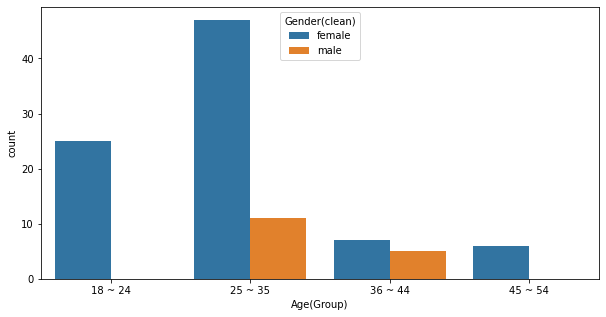

In [28]:
plt.figure(figsize=(10,5))

age_order = ['18 ~ 24','25 ~ 35','36 ~ 44','45 ~ 54']

sns.countplot(data=mk_data[mk_data.VIP == True], x='Age(Group)', hue='Gender(clean)', order=age_order)

In [29]:
mk_data[mk_data.VIP == True]['Gender(clean)'].value_counts()

female    88
male      16
Name: Gender(clean), dtype: int64

In [30]:
mk_data[mk_data.VIP == True]['Gender(clean)'].value_counts()

female    88
male      16
Name: Gender(clean), dtype: int64

<AxesSubplot:xlabel='Gender(clean)', ylabel='count'>

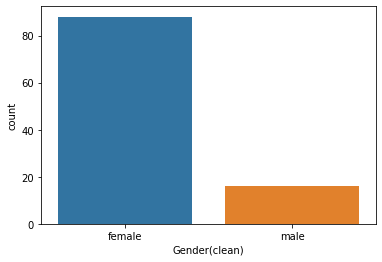

In [31]:
sns.countplot(data=mk_data[mk_data.VIP == True], x='Gender(clean)')

분석 결과 총 15명(임솔지, 홍윤오, 류선정, 서서원, 홍서율, 고서연, 손서애, 문세영, 황수윤, 허지예, 서승희, 윤지안, 정선영, 홍슬비, 오채현)의 VIP 사용자를 발견했습니다. 홍보팀에서는 이 사용자들에게 개별적으로 컨택할 것이며, 눔 코치를 더 만족스럽게 이용할 수 있는 각종 혜택을 조건으로, 눔 코치의 홍보모델로 활동할 것을 제안할 것입니다.

이 사용자들이 제안을 거절할 경우를 대비해서, 조건을 완화한 VIP 사용자(가령 최종 감량치(```Weight Loss(current)```)가 10kg -> 7kg 이상)를 찾야아 할 수도 있을 것입니다. (하지만 마찬가지로 이는 수업 범위 외이므로 패스하겠습니다)

## 결제 체크

이번에는 마케팅팀의 요청을 살펴보도록 하겠습니다.

눔 코치와 같은 서비스에서 가장 중요시 여기는 지표는 크게 두 가지입니다.

  1. 한 명의 고객을 데려오는데 필요한 비용, 줄여서 고객 획득 비용(Customer Acquisition Cost, 이하 **[CAC](https://neilpatel.com/blog/customer-acquisition-cost/)**)
  2. 한 명의 고객을 데려왔을 때, 고객이 회사에게 제공해주는 수익(Customer Lifetime Value, 이하 **[LTV](https://en.wikipedia.org/wiki/Customer_lifetime_value)**)
  
눔 코치에 헌신하는 모든 팀은 LTV를 최대한 높이고, 동시에 CAC를 최대한 낮추는 쪽으로 서비스를 개선합니다. 마케팅 팀 입장에서도 마찬가지입니다. 마케팅팀은 가능한 적은 비용을 지출하여 고객을 눔 코치에 유입시켜야 하며(CAC), 같은 CAC라면 이왕이면 회사에 많은 수익을 남겨주는 고객을 유입해야 합니다. (LTV)

이 과정에서 데이터 분석가(Data Analyst)의 역할은 매우 중요합니다. 데이터분석가는 마케팅팀에게 올바른 지표와 데이터 분석 결과를 제공해줌으로써 그들의 목적을 달성하는데 큰 도움을 줄 수 있습니다. 마케팅팀이 데이터분석가에게 요청하는 내용은 다음과 같습니다.

  * LTV가 높은 고객군의 인구통계학적 정보. 가령 눔 코치와 같은 다이어트 서비스에서는 남성보다 여성이 서비스의 만족도가 높고 많은 지출을 할 가능성이 있습니다. 이 경우, 페이스북 마케팅을 할 때 여성 고객들에게 집중적으로 광고를 보여주도록 타게팅 할 수 있습니다.
  * 요일/시간별 결제 비율. 가령 주중보다 주말에 결제할 확률이 높다면, 서비스를 유료로 결제할 의사가 있는 고객들에게 주말에 결제를 유도하는 메일을 보낼 수 있습니다.
  
이러한 요청을 종합하며, 마케팅팀의 의사결정에 도움이 될 수 있는 정보를 뽑아보도록 하겠습니다.

**9. 결제 / 캔슬 / 환불의 총 인원 수와 비율을 구해주세요.**

먼저 가장 기본적인 정보는 결제 / 캔슬 / 환불 비율입니다. 전체 사용자 중에서, 1) 서비스를 유료로 이용중인 사람(completed), 2) 서비스를 더 이상 이용하지 않고 캔슬한 사람(cancelled) / 3) 서비스를 결제했으나 환불한 사람(refunded)의 비율을 알고 싶습니다. 가령 1) 번은 5400명, 2) 번은 4010명, 3) 번은 590명이 나와야 합니다.

In [32]:
# .value_counts() 를 통해 Status의 종류와 그 누적 갯수를 출력합니다.
data["Status"].value_counts()

completed    5400
cancelled    4010
refunded      590
Name: Status, dtype: int64

**10. 성별과 나이별 결제 / 캔슬 / 환불의 총 인원 수와 비율을 구해주세요.**

9번의 연장선상으로, 이번에는 1) 성별(남자/여자), 2) 나이에 따른 결제/캔슬/환불 비율을 알고 싶습니다. 나이의 경우 다음의 기준으로 그룹을 나눌려고 합니다.

1. 17세 이하
2. 18세 이상, 24세 이하
3. 25세 이상, 35세 이하
4. 36세 이상, 44세 이하
5. 45세 이상, 54세 이하
6. 55세 이상

이렇게 인구통계학적 정보로 결제/캔슬/환불 비율을 확인하면, 마케팅팀에서는 가장 결제가 많이 일어나고 캔슬/환불이 적게 일어나는 성별과 나이에 마케팅 예산을 투입할 수 있습니다. (반대로 캔슬/환불이 빈번하게 일어나는 성별/나이에 해당하는 고객에는 마케팅 예산을 적게 집행할 것입니다)

그러므로 성별/나이를 기준으로 결제/캔슬/환불 비율을 구해주세요. 최종적으로 다음의 결과가 나와야 합니다. (여기서 total은 총 인원 수, conversion은 결제 확률을 나타냅니다)

PS) 주의: 여기서부터는 판다스의 [pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)을 자세히 이해하는 것이 중요합니다. [다음의 링크](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)를 잘 읽어보시는 걸 추천드리고, 여기서부터는 구글 검색을 적극적으로 활용하는 것을 추천 드립니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th>Age(Group)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th rowspan="6" valign="top">female</th>
         <th>00 ~ 17</th>
         <td>25</td>
         <td>35</td>
         <td>3</td>
         <td>63</td>
         <td>0.555556</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>1637</td>
         <td>1827</td>
         <td>149</td>
         <td>3613</td>
         <td>0.505674</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>1664</td>
         <td>2288</td>
         <td>271</td>
         <td>4223</td>
         <td>0.541795</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>206</td>
         <td>421</td>
         <td>46</td>
         <td>673</td>
         <td>0.625557</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>74</td>
         <td>160</td>
         <td>25</td>
         <td>259</td>
         <td>0.617761</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>5</td>
         <td>0</td>
         <td>5</td>
         <td>1.000000</td>
      </tr>
      <tr>
         <th rowspan="6" valign="top">male</th>
         <th>00 ~ 17</th>
         <td>3</td>
         <td>1</td>
         <td>0</td>
         <td>4</td>
         <td>0.250000</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>80</td>
         <td>100</td>
         <td>11</td>
         <td>191</td>
         <td>0.523560</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>235</td>
         <td>404</td>
         <td>57</td>
         <td>696</td>
         <td>0.580460</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>21</td>
         <td>72</td>
         <td>9</td>
         <td>102</td>
         <td>0.705882</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>9</td>
         <td>13</td>
         <td>3</td>
         <td>25</td>
         <td>0.520000</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>1</td>
         <td>1.000000</td>
      </tr>
   </tbody>
</table>

In [33]:
# 'Age(clean)' 컬럼에 apply로 함수를 적용하여 새 컬럼 'Age(Group)'을 만듭니다.
data['Age(Group)'] = data['Age(clean)'].apply(age_grouping)
data.filter(like='Age').head()

,Age,Age(clean),Age(Group)
Access Code,,,
Y9RY2VSI,25.0,25.0,25 ~ 35
3GTN3S3B,26.0,26.0,25 ~ 35
6B0IG276,23.0,23.0,18 ~ 24
EMGRU2MO,20.0,20.0,18 ~ 24
1ELG96TX,28.0,28.0,25 ~ 35


In [34]:
# 성별/나이대 기준으로 결제/캔슬/환불의 건수를 확인하는 피벗테이블을 만듭니다.
# aggfunc = 'count': 각 조건별 데이터 개수를 셉니다. 디폴트는 평균입니다.
# fill_value = 0: NaN으로 표시되는 값을 모두 0으로 변경합니다.
pivot_GenderAge = pd.pivot_table(data, index=['Gender(clean)', 'Age(Group)'], columns='Status', aggfunc='count', values='Name', fill_value=0)

# 'total'과 'conversion' 컬럼을 새로 만듭니다.
pivot_GenderAge['total'] = pivot_GenderAge['cancelled'] + pivot_GenderAge['completed'] + pivot_GenderAge['refunded']
pivot_GenderAge['conversion'] = pivot_GenderAge['completed'] / pivot_GenderAge['total']

pivot_GenderAge.sort_values('conversion', ascending=False)

Status                    cancelled  completed  refunded  total  conversion
Gender(clean) Age(Group)                                                   
female        55 ~ 99             0          5         0      5    1.000000
male          55 ~ 99             0          1         0      1    1.000000
              36 ~ 44            21         72         9    102    0.705882
female        36 ~ 44           206        421        46    673    0.625557
              45 ~ 54            74        160        25    259    0.617761
male          25 ~ 35           235        404        57    696    0.580460
female        00 ~ 17            25         35         3     63    0.555556
              25 ~ 35          1664       2288       271   4223    0.541795
male          18 ~ 24            80        100        11    191    0.523560
              45 ~ 54             9         13         3     25    0.520000
female        18 ~ 24          1637       1827       149   3613    0.505674
male          00 ~ 17             3          1         0      4    0.250000

#### 시각화

In [35]:
GenderAge_plot = pivot_GenderAge.reset_index().iloc[:,:]
GenderAge_plot

Status,Gender(clean),Age(Group),cancelled,completed,refunded,total,conversion
0,female,00 ~ 17,25,35,3,63,0.555556
1,female,18 ~ 24,1637,1827,149,3613,0.505674
2,female,25 ~ 35,1664,2288,271,4223,0.541795
3,female,36 ~ 44,206,421,46,673,0.625557
4,female,45 ~ 54,74,160,25,259,0.617761
5,female,55 ~ 99,0,5,0,5,1.000000
6,male,00 ~ 17,3,1,0,4,0.250000
7,male,18 ~ 24,80,100,11,191,0.523560
8,male,25 ~ 35,235,404,57,696,0.580460
9,male,36 ~ 44,21,72,9,102,0.705882


In [36]:
GenderAge_plot.describe()

Status,cancelled,completed,refunded,total,conversion
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,329.500000,443.916667,47.833333,821.250000,0.618854
std,622.057802,774.056077,82.238935,1472.475536,0.208305
min,0.000000,1.000000,0.000000,1.000000,0.250000
25%,7.500000,11.000000,2.250000,20.000000,0.522670
50%,49.500000,86.000000,10.000000,146.500000,0.568008
75%,213.250000,408.250000,48.750000,678.750000,0.645638
max,1664.000000,2288.000000,271.000000,4223.000000,1.000000


<AxesSubplot:xlabel='Age(Group)', ylabel='total'>

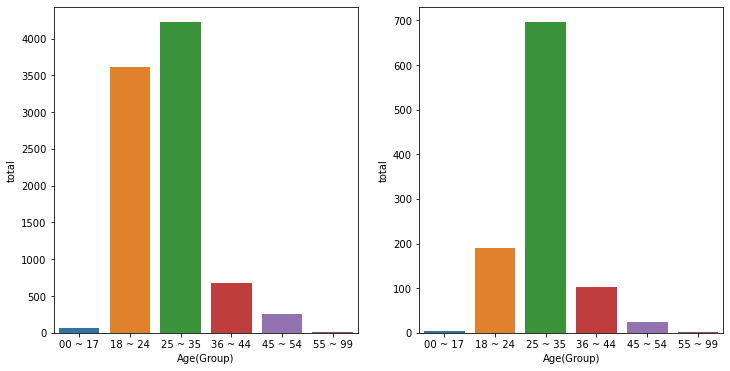

In [37]:
figure, ax = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(12,6)

sns.barplot(data=GenderAge_plot[GenderAge_plot['Gender(clean)']=='female'], x='Age(Group)', y='total', ax=ax[0])
sns.barplot(data=GenderAge_plot[GenderAge_plot['Gender(clean)']=='male'], x='Age(Group)', y='total', ax=ax[1])

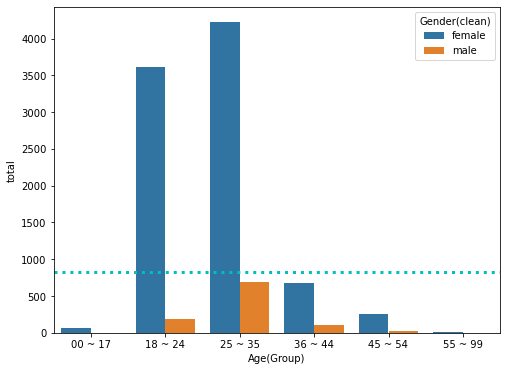

In [38]:
plt.figure(figsize=(8,6))

sns.barplot(data=GenderAge_plot, x='Age(Group)', y='total', hue='Gender(clean)')
plt.axhline(y=GenderAge_plot['total'].mean(), color='c', linewidth=3, linestyle=':')

<AxesSubplot:xlabel='Age(Group)', ylabel='conversion'>

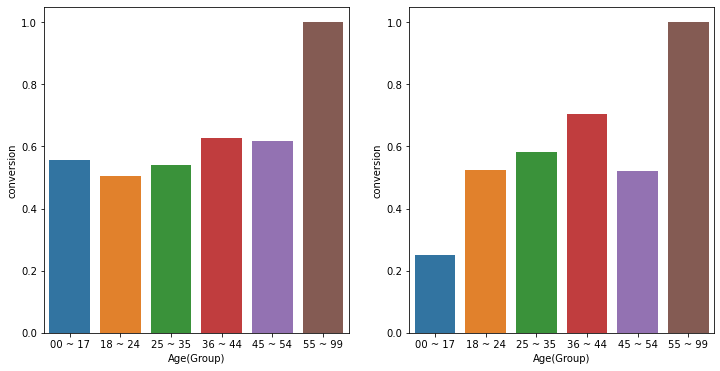

In [39]:
# 전환율

figure, ax = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(12,6)

sns.barplot(data=GenderAge_plot[GenderAge_plot['Gender(clean)']=='female'], x='Age(Group)', y='conversion', ax=ax[0])
sns.barplot(data=GenderAge_plot[GenderAge_plot['Gender(clean)']=='male'], x='Age(Group)', y='conversion', ax=ax[1])

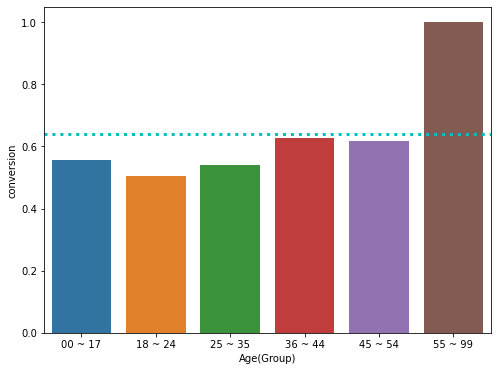

In [40]:
# 여성 전환율

plt.figure(figsize=(8,6))

sns.barplot(data=GenderAge_plot[GenderAge_plot['Gender(clean)']=='female'],
            x='Age(Group)', y='conversion')
plt.axhline(y=GenderAge_plot[GenderAge_plot['Gender(clean)']=='female']['conversion'].mean(),
            color='c', linewidth=3, linestyle=':')

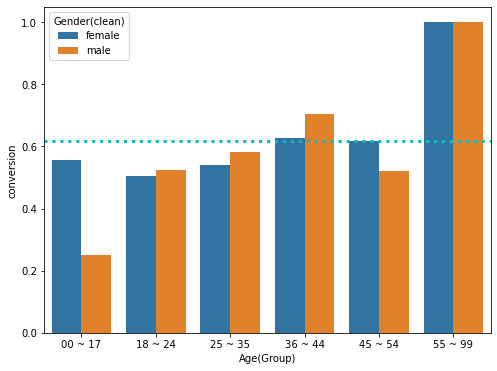

In [41]:
plt.figure(figsize=(8,6))

sns.barplot(data=GenderAge_plot, x='Age(Group)', y='conversion', hue='Gender(clean)')
plt.axhline(y=GenderAge_plot['conversion'].mean(), color='c', linewidth=3, linestyle=':')

분석 결과는 다음과 같습니다.

  * 가장 많은 양의 결제가 일어난 구간은 여성 25 ~ 35세입니다. 총 2288개로, 결제 완료의 40% 이상이 이 구간에서 발생했습니다. 심지어 전환율(conversion)도 54.1%로 평균 이상입니다.
  * 또한 어느 정도 모수가 받쳐주는(결제 완료 100회 이상) 채널 중 이보다 전환율이 높은 채널은 1) 여성 36 ~ 54세, 2) 남성 25 ~ 35세, 3) 남성 36 ~ 44세 입니다. 이 채널들은 전환율이 60% 이상으로 매우 높습니다.
  * 다만 이 채널들의 총 결제자(total)가 낮다는 것은 1) 아직 이 마케팅 채널이 최적화가 덜 되었거나, 2) 고객 획득 비용(CAC)이 높은 편이라 마케팅 비용을 늘리지 않았을 가능성이 있습니다. 또한 아주 희소한 경우이지만, 3) 주 마케팅 채널(ex: 페이스북)에 위 채널에 해당하는 고객의 인원수가 부족할 수도 있습니다.

이런 상황에서, 데이터분석가는 퍼포먼스 마케터와 함께 다음의 아이디어를 제시하여 회사의 매출을 증대할 수 있습니다.

  * 마케팅 예산을 여성 36 ~ 54세쪽에 집중한다. 이 채널이 전환율이 높기 때문에, CAC가 여성 25 ~ 35세와 동일하다면 여성 36 ~ 54세에 마케팅 예산을 늘리는 것은 좋은 전략입니다.
  * 여성 36 ~ 54세 채널의 CAC가 상대적으로 높다면, 이 CAC을 낮추는 시도를 합니다. 이 전략이 성공하면 그 후에 마케팅 예산을 집중하는 것도 방법입니다.
  * 현재 이용하고 있는 광고 채널을 다각화하여, 여성 36 ~ 54세가 활동하는 곳에 집중적으로 마케팅 예산을 투입하는 것도 시도해볼만 합니다.

**11. 날짜와 요일 / 시간별 결제 / 캔슬 / 환불 비율을 구해주세요.**

이번에는 시간 정보를 기준으로 결제/캔슬/환불 비율을 알아보겠습니다. 크게 다음의 상황에 따른 구매 여부를 알고 싶습니다.

  1. 시간별 구매 현황(0시 ~ 23시)
  2. 요일별 구매 현황(월요일 ~ 일요일)
  
마케팅팀이 이 정보를 파악할 수 있다면, 1) 전환율이 높은 시기에 마케팅 예산 투입 비중을 줄이고/늘려서 CAC를 낮추거나, 2) 특정 시간대에 눔 코치의 유로 서비스를 아직 구매하지 않은 무료 사용자에게 유료 서비스 구매를 유도하는 메일을 보내서 매출을 늘릴 것입니다.

크게 다음의 내용을 구해주세요.

1. 0시 ~ 23시 사이의 결제/캔슬/환불 비율.
2. 월요일-일요일 사이의 결제/캔슬/환불 비율.

0시 ~ 23시 사이의 결제/캔슬/환불 비율은 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Purchased At(hour)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>0</th>
         <td>236</td>
         <td>344</td>
         <td>26</td>
         <td>606</td>
         <td>0.567657</td>
      </tr>
      <tr>
         <th>1</th>
         <td>156</td>
         <td>207</td>
         <td>28</td>
         <td>391</td>
         <td>0.529412</td>
      </tr>
      <tr>
         <th>2</th>
         <td>90</td>
         <td>97</td>
         <td>4</td>
         <td>191</td>
         <td>0.507853</td>
      </tr>
      <tr>
         <th>3</th>
         <td>58</td>
         <td>66</td>
         <td>5</td>
         <td>129</td>
         <td>0.511628</td>
      </tr>
      <tr>
         <th>4</th>
         <td>59</td>
         <td>45</td>
         <td>7</td>
         <td>111</td>
         <td>0.405405</td>
      </tr>
      <tr>
         <th>5</th>
         <td>36</td>
         <td>47</td>
         <td>6</td>
         <td>89</td>
         <td>0.528090</td>
      </tr>
      <tr>
         <th>6</th>
         <td>48</td>
         <td>70</td>
         <td>6</td>
         <td>124</td>
         <td>0.564516</td>
      </tr>
      <tr>
         <th>7</th>
         <td>80</td>
         <td>114</td>
         <td>20</td>
         <td>214</td>
         <td>0.532710</td>
      </tr>
      <tr>
         <th>8</th>
         <td>171</td>
         <td>264</td>
         <td>29</td>
         <td>464</td>
         <td>0.568966</td>
      </tr>
      <tr>
         <th>9</th>
         <td>162</td>
         <td>239</td>
         <td>36</td>
         <td>437</td>
         <td>0.546911</td>
      </tr>
      <tr>
         <th>10</th>
         <td>208</td>
         <td>323</td>
         <td>38</td>
         <td>569</td>
         <td>0.567663</td>
      </tr>
      <tr>
         <th>11</th>
         <td>212</td>
         <td>263</td>
         <td>27</td>
         <td>502</td>
         <td>0.523904</td>
      </tr>
      <tr>
         <th>12</th>
         <td>205</td>
         <td>235</td>
         <td>36</td>
         <td>476</td>
         <td>0.493697</td>
      </tr>
      <tr>
         <th>13</th>
         <td>205</td>
         <td>286</td>
         <td>41</td>
         <td>532</td>
         <td>0.537594</td>
      </tr>
      <tr>
         <th>14</th>
         <td>192</td>
         <td>253</td>
         <td>20</td>
         <td>465</td>
         <td>0.544086</td>
      </tr>
      <tr>
         <th>15</th>
         <td>187</td>
         <td>231</td>
         <td>14</td>
         <td>432</td>
         <td>0.534722</td>
      </tr>
      <tr>
         <th>16</th>
         <td>187</td>
         <td>235</td>
         <td>26</td>
         <td>448</td>
         <td>0.524554</td>
      </tr>
      <tr>
         <th>17</th>
         <td>180</td>
         <td>246</td>
         <td>26</td>
         <td>452</td>
         <td>0.544248</td>
      </tr>
      <tr>
         <th>18</th>
         <td>194</td>
         <td>260</td>
         <td>20</td>
         <td>474</td>
         <td>0.548523</td>
      </tr>
      <tr>
         <th>19</th>
         <td>163</td>
         <td>269</td>
         <td>36</td>
         <td>468</td>
         <td>0.574786</td>
      </tr>
      <tr>
         <th>20</th>
         <td>184</td>
         <td>236</td>
         <td>22</td>
         <td>442</td>
         <td>0.533937</td>
      </tr>
      <tr>
         <th>21</th>
         <td>231</td>
         <td>329</td>
         <td>32</td>
         <td>592</td>
         <td>0.555743</td>
      </tr>
      <tr>
         <th>22</th>
         <td>248</td>
         <td>332</td>
         <td>41</td>
         <td>621</td>
         <td>0.534622</td>
      </tr>
      <tr>
         <th>23</th>
         <td>318</td>
         <td>409</td>
         <td>44</td>
         <td>771</td>
         <td>0.530480</td>
      </tr>
   </tbody>
</table>

월요일-일요일 사이의 결제/캔슬/환불 비율은 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Purchased At(weekday)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Monday</th>
         <td>691</td>
         <td>863</td>
         <td>93</td>
         <td>1647</td>
         <td>0.523983</td>
      </tr>
      <tr>
         <th>Tuesday</th>
         <td>694</td>
         <td>935</td>
         <td>102</td>
         <td>1731</td>
         <td>0.540150</td>
      </tr>
      <tr>
         <th>Wednesday</th>
         <td>679</td>
         <td>953</td>
         <td>90</td>
         <td>1722</td>
         <td>0.553426</td>
      </tr>
      <tr>
         <th>Thursday</th>
         <td>616</td>
         <td>813</td>
         <td>88</td>
         <td>1517</td>
         <td>0.535926</td>
      </tr>
      <tr>
         <th>Friday</th>
         <td>490</td>
         <td>674</td>
         <td>56</td>
         <td>1220</td>
         <td>0.552459</td>
      </tr>
      <tr>
         <th>Saturday</th>
         <td>412</td>
         <td>537</td>
         <td>73</td>
         <td>1022</td>
         <td>0.525440</td>
      </tr>
      <tr>
         <th>Sunday</th>
         <td>428</td>
         <td>625</td>
         <td>88</td>
         <td>1141</td>
         <td>0.547765</td>
      </tr>
   </tbody>
</table>

In [42]:
# Purchased At(hour) 컬럼 생성
data['Purchased At(hour)'] = data['Purchased At'].dt.hour

# Purchased At(weekday) 컬럼 생성
data['Purchased At(weekday)'] = data['Purchased At'].dt.day_name()

In [43]:
data[['Purchased At(hour)']]

,Purchased At(hour)
Access Code,
Y9RY2VSI,19
3GTN3S3B,20
6B0IG276,23
EMGRU2MO,20
1ELG96TX,17
...,...
118AFCQ9,0
VDE8FXV9,10
VWJ4NLZY,11


In [44]:
# 시간대 기준으로 결제/캔슬/환불의 건수를 확인하는 피벗테이블을 만듭니다.
# aggfunc = 'count': 각 조건별 데이터 개수를 셉니다. 디폴트는 평균입니다.
# fill_value = 0: NaN으로 표시되는 값을 모두 0으로 변경합니다.
pivot_hour = pd.pivot_table(data, index='Purchased At(hour)', columns='Status', aggfunc='count', values='Name', fill_value=0)

# 'total'과 'conversion' 컬럼을 새로 만듭니다.
pivot_hour['total'] = pivot_hour['cancelled'] + pivot_hour['completed'] + pivot_hour['refunded']
pivot_hour['conversion'] = pivot_hour['completed'] / pivot_hour['total']

pivot_hour

Status,cancelled,completed,refunded,total,conversion
Purchased At(hour),,,,,
0,236,344,26,606,0.567657
1,156,207,28,391,0.529412
2,90,97,4,191,0.507853
3,58,66,5,129,0.511628
4,59,45,7,111,0.405405
5,36,47,6,89,0.528090
6,48,70,6,124,0.564516
7,80,114,20,214,0.532710
8,171,264,29,464,0.568966


#### 시각화

In [45]:
plot_hour = pivot_hour.reset_index()
plot_hour.columns

Index(['Purchased At(hour)', 'cancelled', 'completed', 'refunded', 'total',
       'conversion'],
      dtype='object', name='Status')

<AxesSubplot:xlabel='Purchased At(hour)', ylabel='total'>

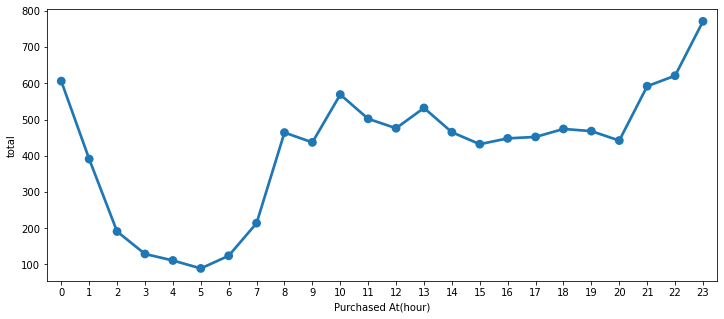

In [46]:
plt.figure(figsize=(12,5))
sns.pointplot(data=plot_hour, x='Purchased At(hour)', y='total')

분석 결과는 다음과 같습니다.

  * 아쉽게도, 구매 시간별 전환율(conversion)은 큰 차이가 없어 보입니다, 그 의미는 특정 시간대에 구매한 사용자들이 서비스를 이탈할 확률이 높아지거나 낮아지는 현상은 없다고 볼 수 있습니다.
  * 다만 전환율과는 별개로, 주로 점심시간(10시 ~ 12시)나 새벽(23시 ~ 24시)에 구매량이 대폭 늘어난다는 것을 알 수 있습니다. 만일 광고 예산을 집행한다면 이 시기에 집중적으로 집행하거나, 무료 사용자에게 유료 사용자로 전환을 유도하는 이메일을 보냄으로써 전환율을 높이는 것은 시도해볼만 합니다.

월요일-일요일 사이의 결제/캔슬/환불 비율은 다음의 방식으로 구할 수 있습니다.

In [47]:
# 요일 기준으로 결제/캔슬/환불의 건수를 확인하는 피벗테이블을 만듭니다.
# aggfunc = 'count': 각 조건별 데이터 개수를 셉니다. 디폴트는 평균입니다. : aggfunc=len 과 동일
# fill_value = 0: NaN으로 표시되는 값을 모두 0으로 변경합니다.
pivot_weekday = pd.pivot_table(data, index='Purchased At(weekday)', columns='Status', aggfunc='count', values='Name', fill_value=0)

# 요일순으로 인덱스를 정렬합니다.
weekday_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_weekday = pivot_weekday.reindex(weekday_sort)

# 'total'과 'conversion' 컬럼을 새로 만듭니다.
pivot_weekday['total'] = pivot_weekday['cancelled'] + pivot_weekday['completed'] + pivot_weekday['refunded']
pivot_weekday['conversion'] = pivot_weekday['completed'] / pivot_weekday['total']

pivot_weekday

Status,cancelled,completed,refunded,total,conversion
Purchased At(weekday),,,,,
Monday,694,935,102,1731,0.540150
Tuesday,679,953,90,1722,0.553426
Wednesday,616,813,88,1517,0.535926
Thursday,490,674,56,1220,0.552459
Friday,412,537,73,1022,0.525440
Saturday,428,625,88,1141,0.547765
Sunday,691,863,93,1647,0.523983


#### 시각화

In [48]:
plot_weekday = pivot_weekday.reset_index()
plot_weekday.columns

Index(['Purchased At(weekday)', 'cancelled', 'completed', 'refunded', 'total',
       'conversion'],
      dtype='object', name='Status')

<AxesSubplot:xlabel='Purchased At(weekday)', ylabel='total'>

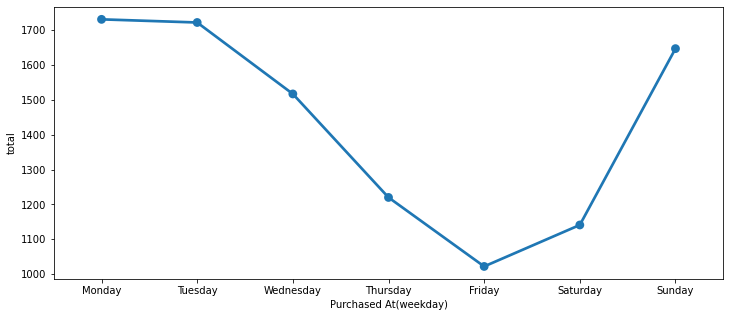

In [49]:
plt.figure(figsize=(12,5))
sns.pointplot(data=plot_weekday, x='Purchased At(weekday)', y='total')

분석 결과는 다음과 같습니다.

  * 구매 시간과 마찬가지로, 구매 요일별 전환율(conversion)은 큰 차이가 없어 보입니다. 어느 요일이나 마찬가지로, 구매한 사람이 서비스를 이탈하거나 남을 확률은 거의 동일합니다.
  * 하지만 사용자들은 전반적으로 주말(금-일)이 다가올수록 구매를 덜 하게되고, 주중(월-수)이 다가올수록 구매를 많이 하게 되는 현상을 발견할 수 있습니다. 이 시기에 광고 예산을 크게 집행하거나, 구매를 유도하는 메일이나 모바일 노티피케이션을 보내는 것은 좋은 아이디어입니다.

**12. 채널별 결제 / 캔슬 / 환불 비율을 알고 싶다.**

이번에는 마케팅 채널별 결제/캔슬/환불 비율을 알고 싶습니다. 현재 눔에서 눔코치를 위해 운영중인 마케팅 채널은 크게 다음과 같습니다.

In [50]:
data["Channel"].value_counts()

facebook     6880
others       1390
naver        1009
direct        297
email         271
google        120
instagram      33
Name: Channel, dtype: int64

이 채널별 마케팅 효율 정보를 알 수 있다면, 마케팅 팀에서 마케팅 예산을 재조정하여 1) 마케팅 효율이 좋은 채널에 예산을 집중하고, 2) 반대로 마케팅 효율이 좋지 않은 채널에 예산을 빼는 재조정(rebalancing)을 할 수 있습니다.

그러므로 채널별 마케팅 결제/캔슬/환불 현황을 구해주세요. 최종적으로는 다음의 결과가 출력되어야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Channel</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>direct</th>
         <td>119</td>
         <td>169</td>
         <td>9</td>
         <td>297</td>
         <td>0.569024</td>
      </tr>
      <tr>
         <th>email</th>
         <td>93</td>
         <td>155</td>
         <td>23</td>
         <td>271</td>
         <td>0.571956</td>
      </tr>
      <tr>
         <th>facebook</th>
         <td>2812</td>
         <td>3654</td>
         <td>414</td>
         <td>6880</td>
         <td>0.531105</td>
      </tr>
      <tr>
         <th>google</th>
         <td>42</td>
         <td>66</td>
         <td>12</td>
         <td>120</td>
         <td>0.550000</td>
      </tr>
      <tr>
         <th>instagram</th>
         <td>13</td>
         <td>17</td>
         <td>3</td>
         <td>33</td>
         <td>0.515152</td>
      </tr>
      <tr>
         <th>naver</th>
         <td>386</td>
         <td>568</td>
         <td>55</td>
         <td>1009</td>
         <td>0.562934</td>
      </tr>
      <tr>
         <th>others</th>
         <td>545</td>
         <td>771</td>
         <td>74</td>
         <td>1390</td>
         <td>0.554676</td>
      </tr>
   </tbody>
</table>

In [51]:
# 채널 기준으로 결제/캔슬/환불의 건수를 확인하는 피벗테이블을 만듭니다.
# aggfunc = 'count': 각 조건별 데이터 개수를 셉니다. 디폴트는 평균입니다.
# fill_value = 0: NaN으로 표시되는 값을 모두 0으로 변경합니다.
pivot_channel = pd.pivot_table(data, index='Channel', columns='Status', aggfunc='count', values='Name', fill_value=0)

# 'total'과 'conversion' 컬럼을 새로 만듭니다.
pivot_channel['total'] = pivot_channel['cancelled'] + pivot_channel['completed'] + pivot_channel['refunded']
pivot_channel['conversion'] = pivot_channel['completed'] / pivot_channel['total']

pivot_channel

Status,cancelled,completed,refunded,total,conversion
Channel,,,,,
direct,119,169,9,297,0.569024
email,93,155,23,271,0.571956
facebook,2812,3654,414,6880,0.531105
google,42,66,12,120,0.550000
instagram,13,17,3,33,0.515152
naver,386,568,55,1009,0.562934
others,545,771,74,1390,0.554676


#### 시각화

In [52]:
plot_channel = pivot_channel.reset_index()
plot_channel.columns

Index(['Channel', 'cancelled', 'completed', 'refunded', 'total', 'conversion'], dtype='object', name='Status')

<AxesSubplot:xlabel='Channel', ylabel='total'>

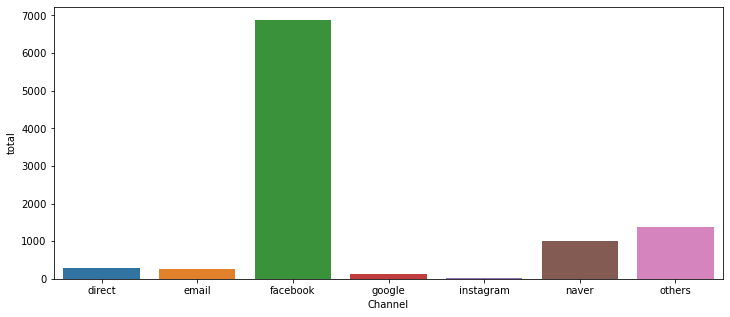

In [53]:
plt.figure(figsize=(12,5))
sns.barplot(data=plot_channel, x='Channel', y='total')

이 결과를 통해 알 수 있는 정보는 다음과 같습니다.

  * 현재 가장 많은 구매가 일어나는 채널은 페이스북(facebook) 입니다. 거의 대부분의 구매가 이 채널에서 일어났습니다.
  * 구매량이 100회 이상인 채널 중 가장 전환율이 높은 채널은 이메일(email) 입니다. 이 채널은 사용자가 눔의 웹사이트에 방문한 뒤, 바로 구매하지 않고 이메일 주소만만 남겨놨을 경우에 해당됩니다.
  * 아직 구매량이 페이스북만큼 많지는 않지만, 전환률이 페이스북보다 높은 채널 중 하나는 네이버(naver)입니다. 전환율이 56%로 페이스북보다 다소 높은 편입니다.
  * 네이버만큼이나 전환율이 높은 채널은 기타(others)입니다. 이 채널은 결제율이 페이스북만큼 높음에도 불구하고, 아쉽게도 기록이 잘 되어있지 않기 때문에 분석이 어렵습니다.
  
이 분석 결과를 통해 얻을 수 있는 아이디어는 다음과 같습니다.
  
  * 먼저 내부에서 트래킹 코드나 데이터 클리닝 코드를 수정하여, 기타(others) 채널을 더 세분화시킬 필요가 있습니다. 기타 채널은 1) 페이스북 만큼이나 구매량이 많으며, 2) 전환율이 페이스북보다 높습니다. 이 채널을 더 세분화시켜 분석한다면 마케팅 효율을 높일 수 있는 새로운 아이디어가 나올 수 있습니다.
  * 페이스북 다음으로 네이버 검색채널을 집중적으로 튜닝하거나 예산을 배정하여 마케팅 채널을 다각화할 수 있습니다.
  * 이메일(email)로 들어온 사용자가 전환율이 높은 이유를 더 분석할 수 있다면 좋겠습니다. 추측컨데, 눔 코치에 대한 신뢰도를 높일 다양한 정보를 이메일로 수신하였기 때문에 다른 채널에 비해 전환율이 높다는 가설을 세울 수 있습니다. 이 가설이 맞다면, 눔 코치를 이용하는 다른 사용자에게도 동일한 정보를 제공한다면 전체 전환율을 높일 수 있을 것입니다.

---

### 월별

In [54]:
data['Purchased At(month)'] = data['Purchased At'].dt.month

In [55]:
pivot_month = pd.pivot_table(data[(data['Age(Group)']=='25 ~ 35') & (data['Gender(clean)']=='female')],
                                      index=['Purchased At(month)'], columns='Status', aggfunc='count',
                                      values='Name', fill_value=0)

pivot_month['total'] = pivot_month['cancelled'] + pivot_month['completed'] + pivot_month['refunded']
pivot_month['conversion'] = pivot_month['completed'] / pivot_month['total']

pivot_month

Status,cancelled,completed,refunded,total,conversion
Purchased At(month),,,,,
3,149,191,30,370,0.516216
4,262,263,22,547,0.480804
5,276,391,20,687,0.569141
6,258,355,62,675,0.525926
7,218,288,30,536,0.537313
8,501,800,107,1408,0.568182


In [56]:
plot_month = pivot_month.reset_index()

<AxesSubplot:xlabel='Purchased At(month)', ylabel='total'>

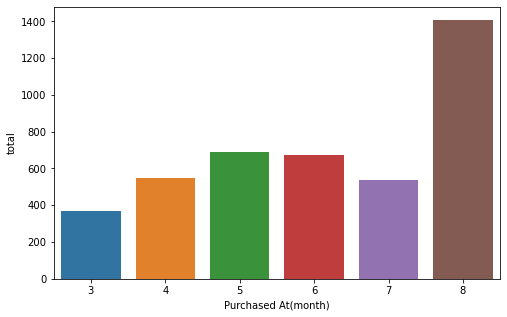

In [57]:
# 2017. 8. 14.에 1000원 결제 이벤트가 있었음


plt.figure(figsize=(8,5))
sns.barplot(data=plot_month, x='Purchased At(month)', y='total')

<AxesSubplot:xlabel='Purchased At(month)', ylabel='conversion'>

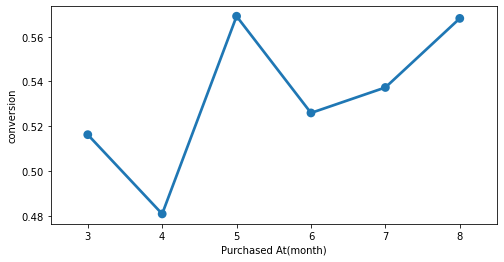

In [58]:
plt.figure(figsize=(8,4))
sns.pointplot(data=plot_month, x='Purchased At(month)', y='conversion')

### 채널별 요일별

In [59]:
data.groupby(['Gender', 'Age(Group)']).count()[['Name']]

Name
Gender Age(Group)      
FEMALE 00 ~ 17       63
       18 ~ 24     3613
       25 ~ 35     4223
       36 ~ 44      673
       45 ~ 54      259
       55 ~ 99        5
MALE   00 ~ 17        4
       18 ~ 24      191
       25 ~ 35      696
       36 ~ 44      102
       45 ~ 54       25
       55 ~ 99        1

In [60]:
# 2535여성
pivot_ChannelWeekday = pd.pivot_table(data[(data['Age(Group)']=='25 ~ 35') & (data['Gender(clean)']=='female')],
                                      index=['Channel', 'Purchased At(weekday)'], columns='Status', aggfunc='count',
                                      values='Name', fill_value=0)

pivot_ChannelWeekday['total'] = pivot_ChannelWeekday['cancelled'] + pivot_ChannelWeekday['completed'] + pivot_ChannelWeekday['refunded']
pivot_ChannelWeekday['conversion'] = pivot_ChannelWeekday['completed'] / pivot_ChannelWeekday['total']

In [61]:
plot_ChannelWeekday = pivot_ChannelWeekday.reset_index()

<AxesSubplot:xlabel='Channel', ylabel='total'>

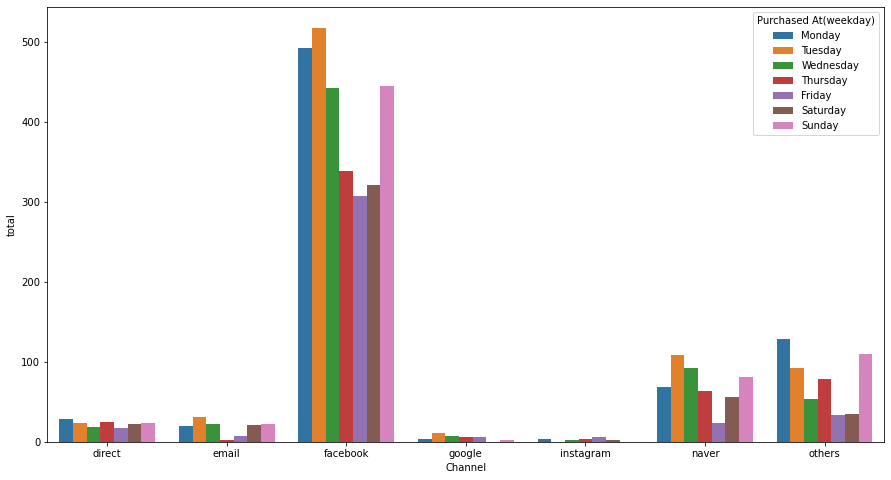

In [62]:
plt.figure(figsize=(15,8))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(data=plot_ChannelWeekday, x='Channel', y='total', hue='Purchased At(weekday)', hue_order=weekday_order)

<AxesSubplot:xlabel='Purchased At(weekday)', ylabel='conversion'>

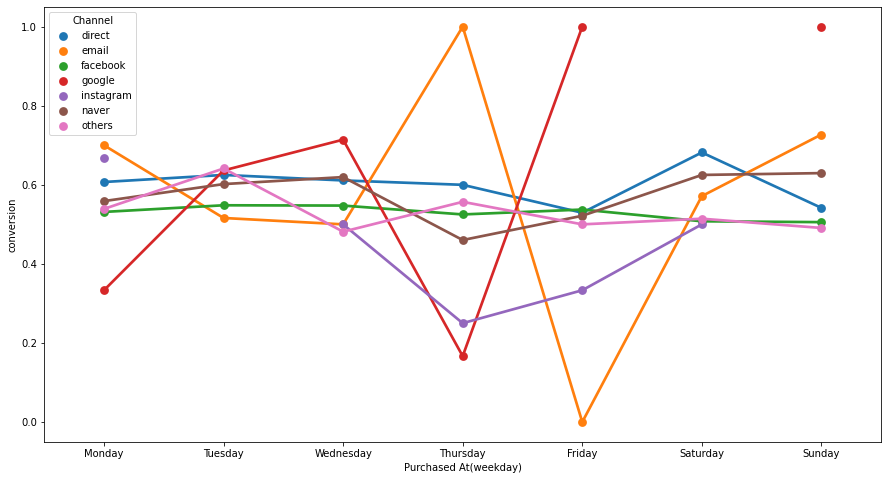

In [63]:
plt.figure(figsize=(15,8))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.pointplot(data=plot_ChannelWeekday, x='Purchased At(weekday)', y='conversion', hue='Channel', order=weekday_order)

<AxesSubplot:xlabel='Purchased At(weekday)', ylabel='conversion'>

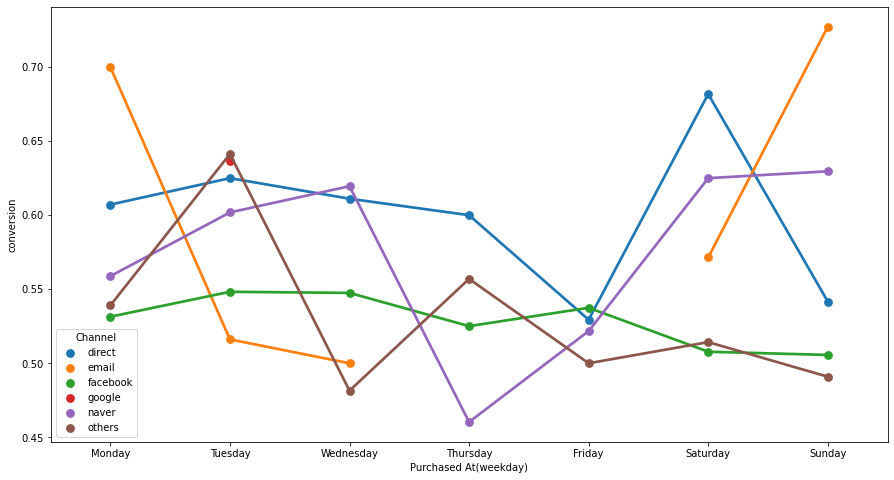

In [64]:
plt.figure(figsize=(15,8))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.pointplot(data=plot_ChannelWeekday[plot_ChannelWeekday['total']>=8], x='Purchased At(weekday)', y='conversion', hue='Channel',
              order=weekday_order)

---

### 코치 데이터와 매칭

다음은 사용자 데이터와 코치 데이터를 합쳐서 분석해보겠습니다. 코치 데이터 분석에서 가장 중요한 것은, 좋은 코칭을 하는 사람과 그렇지 못한 사람을 구분하는 것입니다.

코칭팀에서는 좋은 코칭을 하는 코치의 노하우를 정리하여 다른 코치들에게 전파할 필요가 있고, 정 반대로 좋지 않은 코칭을 하는 코치와는 개별 면담을 통해 코칭 퀄리티를 높여야 합니다. 좋은 코칭과 좋지 않은 코칭은 결제 비율과 캔슬 비율, 그리고 환불 비율로 판단할 수 있습니다.

이번에는 데이터 분석을 통해 눔 코치 서비스의 코칭 만족도를 분석해보겠습니다.

In [65]:
# 먼저 코칭 데이터를 가져옵니다.
# 이 결과를 coach라는 이름의 변수에 할당합니다.
coach = pd.read_csv("data/noom/noom_coach.csv", index_col="Access Code")

# coach 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coach.shape)

# coach 데이터의 상위 5개를 출력합니다.
coach.head()

(10000, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


여기서 인덱스(index)는 눔 코치 사용자들의 아이디(```Access Code```), 열(column)은 코치들의 이름과 아이디(```Access Code```)입니다. 값은 코치가 사용자에게 코칭을 한 횟수를 나타냅니다. (한 명의 사용자가 여러 명의 코치에게 코칭을 받는 것도 가능합니다)

**13. 기존의 데이터와 코치 데이터를 합쳐주세요.** 

먼저 기존 데이터와 코치 데이터를 하나로 합쳐야 분석을 할 수 있습니다. 두 개의 데이터를 하나로 합쳐주세요. 판다스(Pandas)로 데이터를 합치는 방법은 [Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) 를 참고하시면 됩니다. 최종적으로는 다음의 결과가 출력되야 합니다.

<table border="1" class="dataframe">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Status</th>
         <th>&#51221;&#51008;&#50724; &#53076;&#52824;(VEV4PGJB)</th>
         <th>&#50724;&#49849;&#54785; &#53076;&#52824;(VENPKBP9)</th>
         <th>&#51312;&#49548;&#51008; &#53076;&#52824;(D0WASBXN)</th>
         <th>&#44256;&#50689;&#51116; &#53076;&#52824;(C91AVNGB)</th>
         <th>&#51312;&#49688;&#48124; &#53076;&#52824;(OBCAO3W0)</th>
         <th>&#44053;&#52292;&#50500; &#53076;&#52824;(WH2NIKCO)</th>
         <th>&#54889;&#45796;&#54984; &#53076;&#52824;(1I6IWURH)</th>
         <th>&#48177;&#49836;&#51008; &#53076;&#52824;(228BFB50)</th>
         <th>&#50976;&#52292;&#50864; &#53076;&#52824;(IW53Y9AW)</th>
         <th>&#49569;&#51648;&#49440; &#53076;&#52824;(WL0877P7)</th>
         <th>&#54728;&#49457;&#50896; &#53076;&#52824;(9124O1IH)</th>
         <th>&#52572;&#49436;&#50984; &#53076;&#52824;(UVZALFE3)</th>
         <th>&#50980;&#52292;&#50980; &#53076;&#52824;(U95EGIDM)</th>
         <th>&#54728;&#49836;&#51648; &#53076;&#52824;(DWVG5IFL)</th>
         <th>&#44608;&#49836;&#48124; &#53076;&#52824;(CWI0ABRI)</th>
         <th>&#51221;&#46041;&#51064; &#53076;&#52824;(UQN9899Z)</th>
         <th>&#50724;&#49884;&#54788; &#53076;&#52824;(7XM3L93F)</th>
         <th>&#44608;&#49436;&#51008; &#53076;&#52824;(FOT4SH4F)</th>
         <th>&#47928;&#49440;&#50500; &#53076;&#52824;(W5AZL2WT)</th>
         <th>&#44608;&#50980; &#52292; &#53076;&#52824;(COZ180VA)</th>
         <th>&#50577;&#49436;&#50984; &#53076;&#52824;(A2A98OA6)</th>
         <th>&#44428;&#49836;&#50689; &#53076;&#52824;(E3GD4106)</th>
         <th>&#48149;&#49457;&#54788; &#53076;&#52824;(JKKV62JR)</th>
         <th>&#51312;&#49444;&#50689; &#53076;&#52824;(U7L98DAO)</th>
         <th>&#48177;&#49464;&#50896; &#53076;&#52824;(2Z1S5CYM)</th>
         <th>&#51312;&#51648;&#50696; &#53076;&#52824;(ZA6B8Y4I)</th>
         <th>&#54889;&#49444;&#50672; &#53076;&#52824;(RJEZWP8M)</th>
         <th>&#50980;&#46020;&#50896; &#53076;&#52824;(IOVT84RW)</th>
         <th>&#44428;&#49548;&#48124; &#53076;&#52824;(OM3X0HPF)</th>
         <th>&#49552;&#49457;&#50500; &#53076;&#52824;(DE2CQ3UB)</th>
         <th>&#47928;&#52292;&#54785; &#53076;&#52824;(9JP9WCLH)</th>
         <th>&#49888;&#52292;&#49556; &#53076;&#52824;(01CM47G7)</th>
         <th>&#50980;&#51456;&#54840; &#53076;&#52824;(RGSJNWC1)</th>
         <th>&#54889;&#49884;&#51456; &#53076;&#52824;(M7EJJXFT)</th>
         <th>&#48176;&#49836;&#48120; &#53076;&#52824;(ZT7MO305)</th>
         <th>&#54728;&#49436;&#48712; &#53076;&#52824;(AKR0QZ53)</th>
         <th>&#54728;&#50696;&#52268; &#53076;&#52824;(2F23UZOK)</th>
         <th>&#44428;&#50980;&#54980; &#53076;&#52824;(2JNSCXG9)</th>
         <th>&#48177;&#49464;&#48124; &#53076;&#52824;(P770M0WG)</th>
         <th>&#51221;&#54952;&#51456; &#53076;&#52824;(W9MLRQ03)</th>
         <th>&#49569;&#49836;&#55148; &#53076;&#52824;(UXFNB9P9)</th>
         <th>&#51221;&#54952;&#49457; &#53076;&#52824;(E1RQ3HCM)</th>
         <th>&#50724;&#49884;&#54785; &#53076;&#52824;(6NJXI005)</th>
         <th>&#50724;&#46041;&#50756; &#53076;&#52824;(0O48DQCH)</th>
         <th>&#51076;&#49836;&#51648; &#53076;&#52824;(TXKB5IPL)</th>
         <th>&#51312;&#49436;&#50689; &#53076;&#52824;(0VG1N1M4)</th>
         <th>&#48149;&#49457;&#48124; &#53076;&#52824;(Z3EDAX7O)</th>
         <th>&#52572;&#51060;&#54984; &#53076;&#52824;(F9BXHUIW)</th>
         <th>&#49888;&#52264;&#48124; &#53076;&#52824;(BXQNFYSE)</th>
         <th>&#50504;&#52292;&#54788; &#53076;&#52824;(WEURSEW0)</th>
         <th>&#51312;&#50864;&#52268; &#53076;&#52824;(WWN531JQ)</th>
         <th>&#44608;&#52268;&#54785; &#53076;&#52824;(ZPKK20QU)</th>
         <th>&#48176;&#49556;&#50980; &#53076;&#52824;(WC0AC6ME)</th>
         <th>&#49569;&#51648;&#50504; &#53076;&#52824;(2MNIJN3F)</th>
         <th>&#49552;&#52292;&#50500; &#53076;&#52824;(BL3GH0DR)</th>
         <th>&#50504;&#49457;&#51008; &#53076;&#52824;(Z58HLXF1)</th>
         <th>&#54620;&#46041;&#54620; &#53076;&#52824;(TSFSQH0A)</th>
         <th>&#54889;&#49548;&#50689; &#53076;&#52824;(91YZ8NY0)</th>
         <th>&#48177;&#49444;&#55148; &#53076;&#52824;(EAIJXNHP)</th>
         <th>&#47928;&#49464;&#55148; &#53076;&#52824;(7NQPBZK3)</th>
         <th>&#54889;&#51116;&#50864; &#53076;&#52824;(YIFMV1GQ)</th>
         <th>&#51076;&#49836;&#48124; &#53076;&#52824;(GWF6MDWP)</th>
         <th>&#48149;&#46020;&#50689; &#53076;&#52824;(I4KVQ5G0)</th>
         <th>&#54728;&#49688;&#50672; &#53076;&#52824;(Z6YFPL34)</th>
         <th>&#54728;&#51452;&#50896; &#53076;&#52824;(71T6JNK0)</th>
         <th>&#51060;&#51648;&#50696; &#53076;&#52824;(Z77MI98E)</th>
         <th>&#51109;&#51648;&#54952; &#53076;&#52824;(XBJH0VO3)</th>
         <th>&#49888;&#49688;&#50672; &#53076;&#52824;(4274HJ8M)</th>
         <th>&#50504;&#52292;&#50980; &#53076;&#52824;(IAYRGMJ2)</th>
         <th>&#44608;&#50980;&#44508; &#53076;&#52824;(E7BBXJHO)</th>
         <th>&#50724;&#49688;&#51652; &#53076;&#52824;(9ZKGH8EO)</th>
         <th>&#48149;&#49436;&#50672; &#53076;&#52824;(5NXNMBCN)</th>
         <th>&#51204;&#51648;&#50756; &#53076;&#52824;(P6QG38DS)</th>
         <th>&#48177;&#52292;&#54984; &#53076;&#52824;(89CN5XHA)</th>
         <th>&#48177;&#51008;&#49457; &#53076;&#52824;(WWFBXFX6)</th>
         <th>&#47928;&#49548;&#50980; &#53076;&#52824;(2WDVTB40)</th>
         <th>&#54620;&#46041;&#50696; &#53076;&#52824;(OD8IV4Q5)</th>
         <th>&#44428;&#49884;&#50980; &#53076;&#52824;(4MEMXAVM)</th>
         <th>&#51312;&#52488;&#50672; &#53076;&#52824;(3JBE9GKO)</th>
         <th>&#51312;&#49688;&#50500; &#53076;&#52824;(V5CSCQ45)</th>
         <th>&#44053;&#51648;&#55148; &#53076;&#52824;(NOEP7X8B)</th>
         <th>&#47928;&#49849;&#54785; &#53076;&#52824;(6LHXIU5N)</th>
         <th>&#48149;&#49457;&#51008; &#53076;&#52824;(4KO70A9P)</th>
         <th>&#47928;&#49440;&#55148; &#53076;&#52824;(NTELEEEO)</th>
         <th>&#44053;&#51008;&#50864; &#53076;&#52824;(EJIHL7OE)</th>
         <th>&#51109;&#49849;&#55148; &#53076;&#52824;(85BWE3V1)</th>
         <th>&#44256;&#49688;&#51060; &#53076;&#52824;(NKHXTMRU)</th>
         <th>&#51204;&#51648;&#54788; &#53076;&#52824;(SQHB3H66)</th>
         <th>&#49552;&#49688;&#50672; &#53076;&#52824;(Z5GQG6SI)</th>
         <th>&#49888;&#49457;&#48712; &#53076;&#52824;(7CIDQT0X)</th>
         <th>&#50724;&#52488;&#48712; &#53076;&#52824;(A3WOLAQM)</th>
         <th>&#49436;&#49688;&#51221; &#53076;&#52824;(F36LORFC)</th>
         <th>&#51221;&#49436;&#50984; &#53076;&#52824;(LX1G7EMD)</th>
         <th>&#44256;&#50864;&#51116; &#53076;&#52824;(SKNL9Z4P)</th>
         <th>&#47928;&#54620;&#44508; &#53076;&#52824;(OU1WVDGA)</th>
         <th>&#54889;&#49464;&#50504; &#53076;&#52824;(3QUBQAVE)</th>
         <th>&#54861;&#49457;&#51008; &#53076;&#52824;(2I3QJQ5O)</th>
         <th>&#44256;&#49457;&#51008; &#53076;&#52824;(34T7XPYR)</th>
         <th>&#48177;&#54620;&#50984; &#53076;&#52824;(HPWAN8R0)</th>
         <th>&#50504;&#49836;&#51008; &#53076;&#52824;(QAVWJSZ1)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>&#44608;&#49849;&#54812;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>&#54728;&#49849;&#51456;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>2</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>2</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>&#51060;&#51648;&#48124;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>&#51109;&#49444;&#50980;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>&#49436;&#49457;&#48712;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
   </tbody>
</table>

힌트: pd.[concat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)을 사용하면 편하게 두 개의 데이터프레임을 합칠 수 있습니다.

In [66]:
# axis = 1: 열 방향
coach_data = pd.concat([data[['Name', 'Status']], coach], axis=1)
coach_data.head()

,Name,Status,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,completed,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,허승준,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,이지민,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,장설윤,completed,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,서성빈,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**14. 코치별 담당 사용자(total) / 구매 완료 횟수(completed) / 캔슬 횟수(canceled) / 환불 횟수(refunded)를 구해주세요.**

이 수치를 통해 좋은 코칭을 하는 사람과 좋은 코칭을 하지 못하는 사람을 구분할 수 있습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>&#51221;&#51008;&#50724; &#53076;&#52824;(VEV4PGJB)</th>
         <td>18</td>
         <td>23</td>
         <td>3</td>
      </tr>
      <tr>
         <th>&#50724;&#49849;&#54785; &#53076;&#52824;(VENPKBP9)</th>
         <td>14</td>
         <td>44</td>
         <td>9</td>
      </tr>
      <tr>
         <th>&#51312;&#49548;&#51008; &#53076;&#52824;(D0WASBXN)</th>
         <td>12</td>
         <td>12</td>
         <td>1</td>
      </tr>
      <tr>
         <th>&#44256;&#50689;&#51116; &#53076;&#52824;(C91AVNGB)</th>
         <td>22</td>
         <td>27</td>
         <td>4</td>
      </tr>
      <tr>
         <th>&#51312;&#49688;&#48124; &#53076;&#52824;(OBCAO3W0)</th>
         <td>49</td>
         <td>46</td>
         <td>8</td>
      </tr>
   </tbody>
</table>

In [67]:
# Status 기준으로 그룹하여 확인합니다.
# .T 를 이용하여 결과값의 행열을 전환합니다.
coach_status = coach_data.groupby('Status').sum().T
coach_status.head()

Status,cancelled,completed,refunded
정은오 코치(VEV4PGJB),18,23,3
오승혁 코치(VENPKBP9),14,44,9
조소은 코치(D0WASBXN),12,12,1
고영재 코치(C91AVNGB),22,27,4
조수민 코치(OBCAO3W0),49,46,8


**15. 코치별 전환율(conversion rate) / 취소율(cancellation rate)를 계산해주세요.**

여기서 전환율은 전체 구매자 대비 구매 완료(completed)를 한 사람, 취소율은 전체 구매자 대비 취소(cancelled)나 환불(refunded)을 한 사람을 나타냅니다. 이 두 개를 구한 뒤, 1) 전환율이 높은 코치, 2) 취소율이 높은 코치 순으로 정렬해주세요. 단 모수가 부족한 경우를 배제하기 위해, 코칭을 100회 이상 하지 않은 사용자는 배제하도록 하겠습니다.

전환율이 높을수록 해당 코치가 고객에게 만족스러운 코칭을 제공한다고 볼 수 있으며, 해당 코치의 노하우를 다른 코치들에게 전파할 수 있도록 노력해야 합니다. 최종적으로 다음의 결과가 나와야 합니다.


<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion rate</th>
         <th>cancellation rate</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>&#51312;&#50864;&#52268; &#53076;&#52824;(WWN531JQ)</th>
         <td>36</td>
         <td>65</td>
         <td>6</td>
         <td>107</td>
         <td>0.607477</td>
         <td>0.392523</td>
      </tr>
      <tr>
         <th>&#54728;&#49836;&#51648; &#53076;&#52824;(DWVG5IFL)</th>
         <td>43</td>
         <td>71</td>
         <td>3</td>
         <td>117</td>
         <td>0.606838</td>
         <td>0.393162</td>
      </tr>
      <tr>
         <th>&#54728;&#49457;&#50896; &#53076;&#52824;(9124O1IH)</th>
         <td>43</td>
         <td>76</td>
         <td>7</td>
         <td>126</td>
         <td>0.603175</td>
         <td>0.396825</td>
      </tr>
      <tr>
         <th>&#51312;&#49444;&#50689; &#53076;&#52824;(U7L98DAO)</th>
         <td>48</td>
         <td>78</td>
         <td>6</td>
         <td>132</td>
         <td>0.590909</td>
         <td>0.409091</td>
      </tr>
      <tr>
         <th>&#44428;&#49836;&#50689; &#53076;&#52824;(E3GD4106)</th>
         <td>42</td>
         <td>70</td>
         <td>9</td>
         <td>121</td>
         <td>0.578512</td>
         <td>0.421488</td>
      </tr>
   </tbody>
</table>

반면 취소율이 높을수록 해당 코치가 고객에게 만족스럽지 않은 코칭을 제공한다고 볼 수 있습니다. 이럴 경우 구체적으로 어떤 부분에서 문제가 생겼는지를 코칭팀에서 파악하여 이를 수정할 수 있어야 합니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion rate</th>
         <th>cancellation rate</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>&#51312;&#49688;&#48124; &#53076;&#52824;(OBCAO3W0)</th>
         <td>49</td>
         <td>46</td>
         <td>8</td>
         <td>103</td>
         <td>0.446602</td>
         <td>0.553398</td>
      </tr>
      <tr>
         <th>&#48149;&#46020;&#50689; &#53076;&#52824;(I4KVQ5G0)</th>
         <td>77</td>
         <td>70</td>
         <td>6</td>
         <td>153</td>
         <td>0.457516</td>
         <td>0.542484</td>
      </tr>
      <tr>
         <th>&#50724;&#46041;&#50756; &#53076;&#52824;(0O48DQCH)</th>
         <td>55</td>
         <td>56</td>
         <td>7</td>
         <td>118</td>
         <td>0.474576</td>
         <td>0.525424</td>
      </tr>
      <tr>
         <th>&#51312;&#52488;&#50672; &#53076;&#52824;(3JBE9GKO)</th>
         <td>55</td>
         <td>56</td>
         <td>5</td>
         <td>116</td>
         <td>0.482759</td>
         <td>0.517241</td>
      </tr>
      <tr>
         <th>&#50724;&#52488;&#48712; &#53076;&#52824;(A3WOLAQM)</th>
         <td>124</td>
         <td>150</td>
         <td>27</td>
         <td>301</td>
         <td>0.498339</td>
         <td>0.501661</td>
      </tr>
   </tbody>
</table>

In [68]:
coach_status['total'] = coach_status.cancelled + coach_status.completed + coach_status.refunded
coach_status['conversion rate'] = coach_status.completed / coach_status.total
coach_status['cancellation rate'] = (coach_status.cancelled + coach_status.refunded) / coach_status.total

coach_status[coach_status.total > 100].sort_values('conversion rate', ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조우찬 코치(WWN531JQ),36,65,6,107,0.607477,0.392523
허슬지 코치(DWVG5IFL),43,71,3,117,0.606838,0.393162
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.396825
조설영 코치(U7L98DAO),48,78,6,132,0.590909,0.409091
권슬영 코치(E3GD4106),42,70,9,121,0.578512,0.421488


In [69]:
coach_status[coach_status.total > 100].sort_values('cancellation rate', ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398
박도영 코치(I4KVQ5G0),77,70,6,153,0.457516,0.542484
오동완 코치(0O48DQCH),55,56,7,118,0.474576,0.525424
조초연 코치(3JBE9GKO),55,56,5,116,0.482759,0.517241
오초빈 코치(A3WOLAQM),124,150,27,301,0.498339,0.501661


이제 이 결과를 바탕으로, 고객에게 만족도를 높일 수 있도록 코칭을 개선할 수 있을 것입니다.